In [80]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [36]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144788 entries, 0 to 144787
Columns: 139 entries, SellerCode to Payment1st3Months_F
dtypes: float64(36), int64(103)
memory usage: 153.5 MB


In [37]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131877 entries, 0 to 131876
Columns: 143 entries, SellerCode to Payment1st3Months_F
dtypes: float64(36), int64(107)
memory usage: 143.9 MB


In [38]:
dtype_df_train = train.dtypes.reset_index()
dtype_df_train.columns = ["Count", "Column Type"]
dtype_df_train

,Count,Column Type
0,SellerCode,int64
1,FollowingFlag,int64
2,citycode,float64
3,GenderCode,float64
4,CustomerAge,float64
5,CustomerAgeGroup,int64
6,LoanCountasGuarantor,int64
7,LoanCountasGuarantorGroup,int64
8,DistinctGuarantorCount,int64
9,ProtocolCount,int64


In [39]:
dtype_df_test = test.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test

,Count,Column Type
0,SellerCode,int64
1,FollowingFlag,int64
2,citycode,float64
3,GenderCode,float64
4,CustomerAge,float64
5,CustomerAgeGroup,int64
6,LoanCountasGuarantor,int64
7,LoanCountasGuarantorGroup,int64
8,DistinctGuarantorCount,int64
9,ProtocolCount,int64


In [40]:
dtype_df_train.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,103
1,float64,36


In [41]:
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,107
1,float64,36


In [42]:
for name in test.columns:
    if name not in train.columns:
        print(name)

Inbound_Count_-12+Month
Inbound_Duration_-12+Month
Inbound_Count_Ever
Inbound_Duration_Ever


In [43]:
test = test.drop(['Inbound_Count_-12+Month', 'Inbound_Duration_-12+Month',
                  'Inbound_Count_Ever','Inbound_Duration_Ever'], axis=1)

In [44]:
dtype_df_test = test.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,103
1,float64,36


In [45]:
missing_df_train = train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train['missing_ratio'] = missing_df_train['missing_count'] / train.shape[0]
missing_df_train.loc[missing_df_train['missing_count']>0]

,column_name,missing_count,missing_ratio
2,citycode,1963,0.013558
3,GenderCode,2,0.000014
4,CustomerAge,1,0.000007


In [46]:
medianCityCode = train['citycode'].median(axis=0)
train['citycode'].fillna(medianCityCode, inplace=True)
medianGenderCode = train['GenderCode'].median(axis=0)
train['GenderCode'].fillna(medianGenderCode, inplace=True)
medianCustomerAge = train['CustomerAge'].median(axis=0)
train['CustomerAge'].fillna(medianCustomerAge, inplace=True)

In [47]:
missing_df_train = train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train['missing_ratio'] = missing_df_train['missing_count'] / train.shape[0]
missing_df_train.loc[missing_df_train['missing_count']>0]

,column_name,missing_count,missing_ratio


In [48]:
missing_df_test = test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test.shape[0]
missing_df_test.loc[missing_df_test['missing_count']>0]

,column_name,missing_count,missing_ratio
2,citycode,1851,0.014036
3,GenderCode,174,0.001319
4,CustomerAge,3,0.000023


In [49]:
medianCityCode = test['citycode'].median(axis=0)
test['citycode'].fillna(medianCityCode, inplace=True)
medianGenderCode = test['GenderCode'].median(axis=0)
test['GenderCode'].fillna(medianGenderCode, inplace=True)
medianCustomerAge = test['CustomerAge'].median(axis=0)
test['CustomerAge'].fillna(medianCustomerAge, inplace=True)

In [50]:
missing_df_test = test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test.shape[0]
missing_df_test.loc[missing_df_test['missing_count']>0]

,column_name,missing_count,missing_ratio


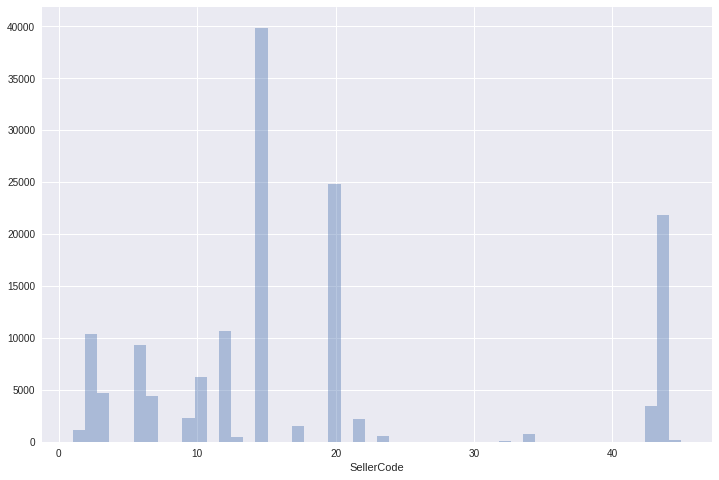

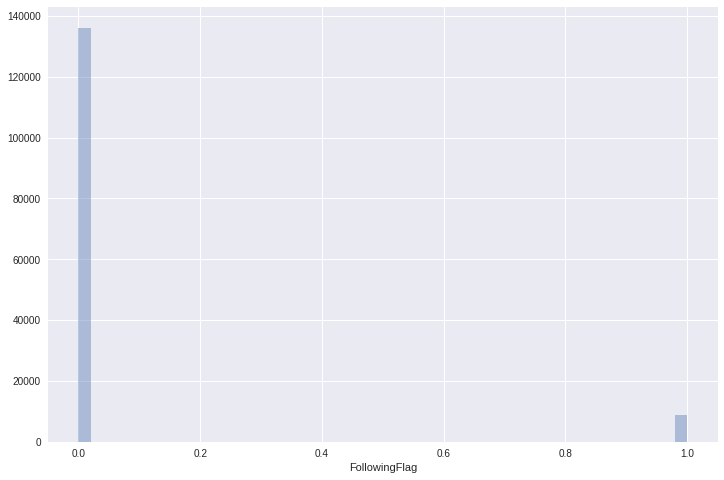

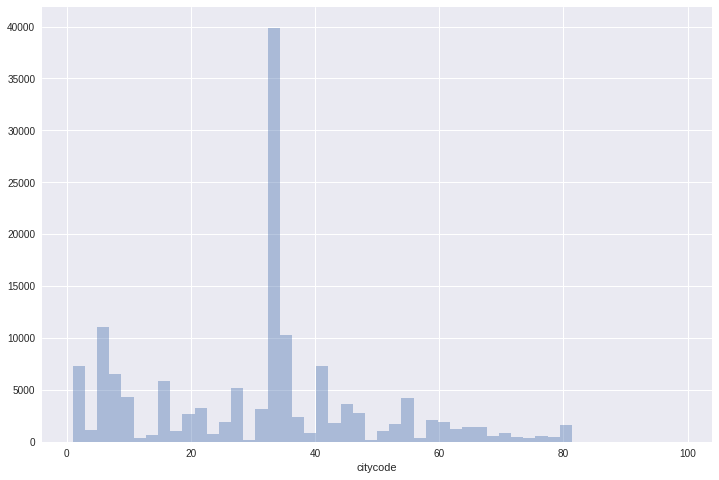

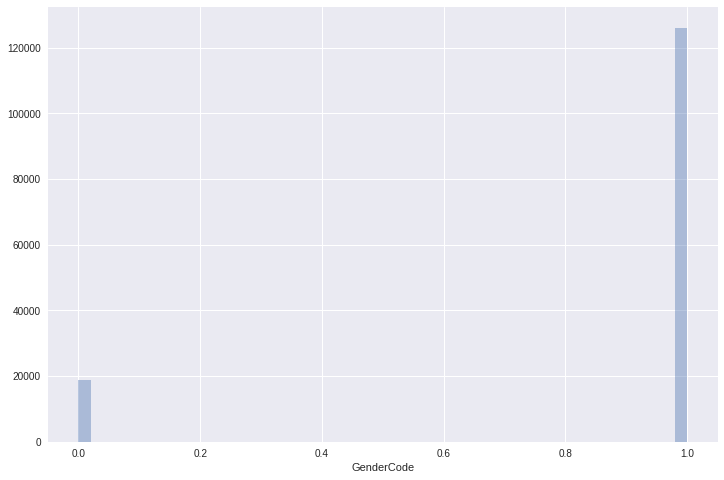

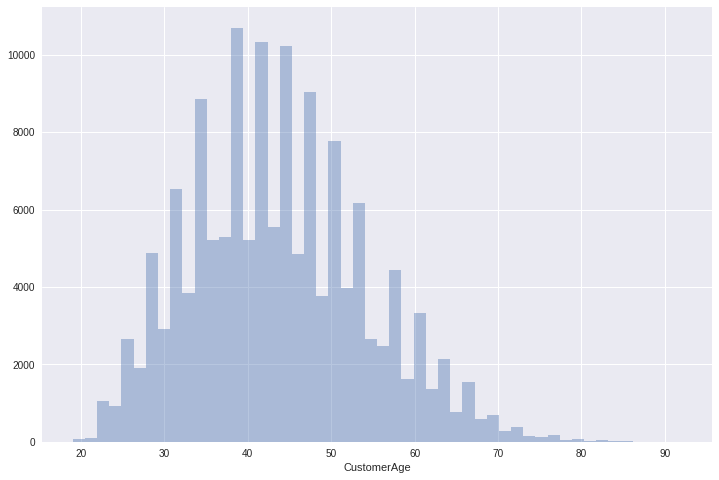

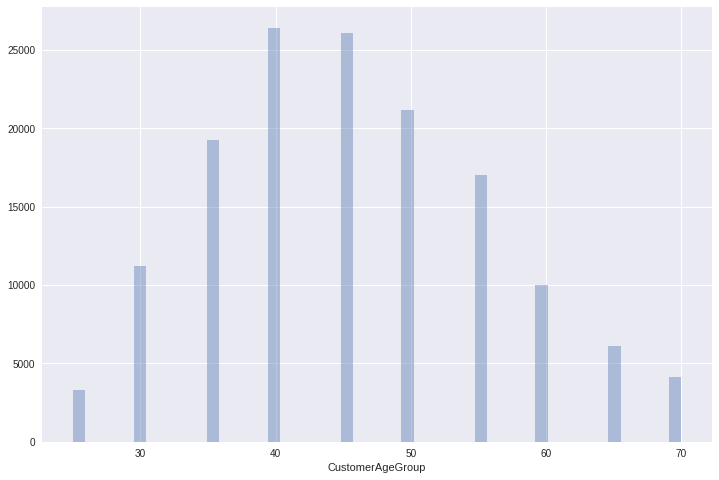

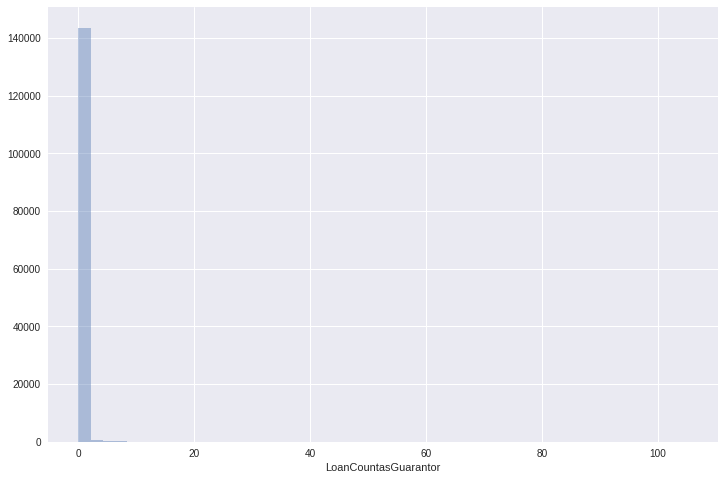

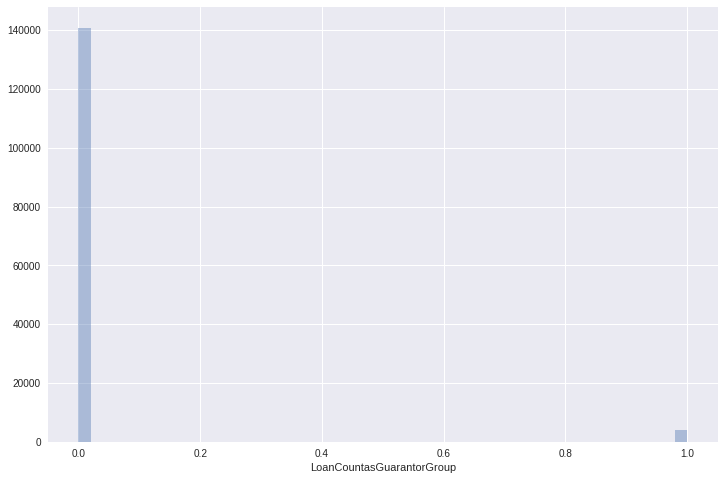

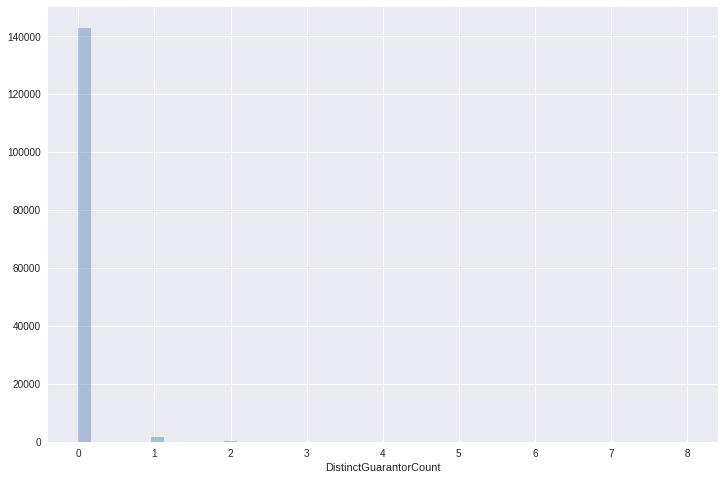

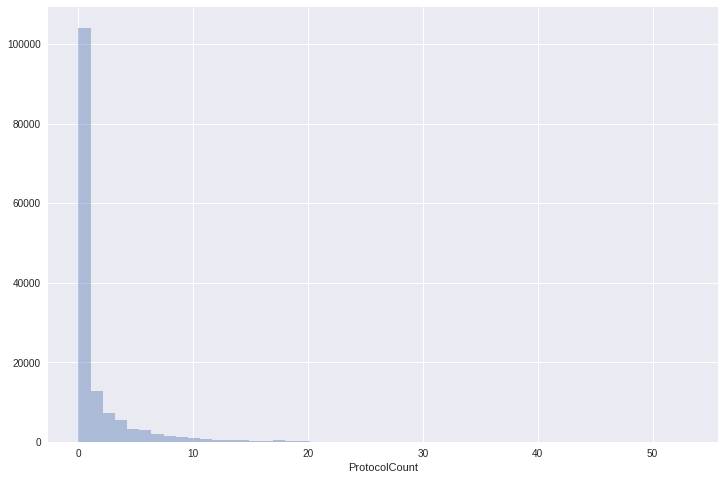

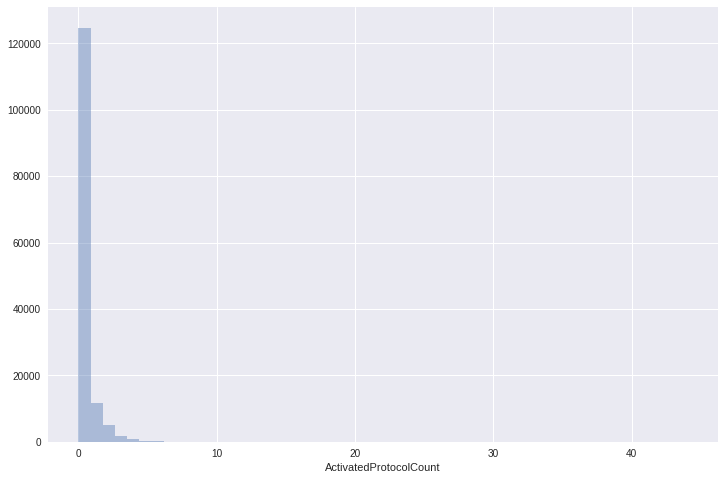

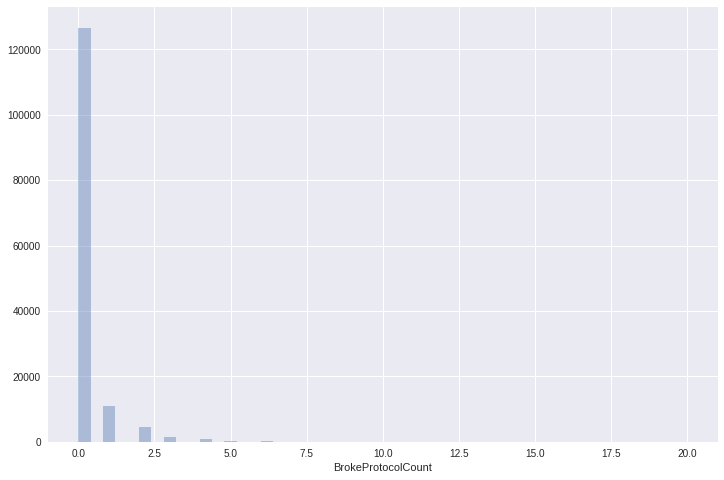

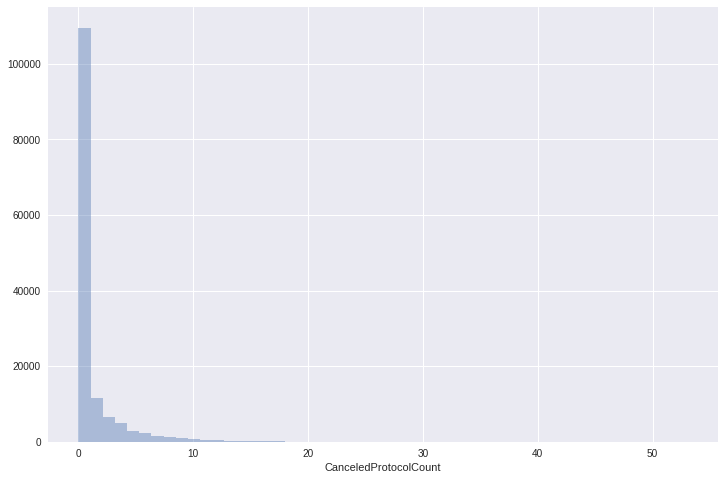

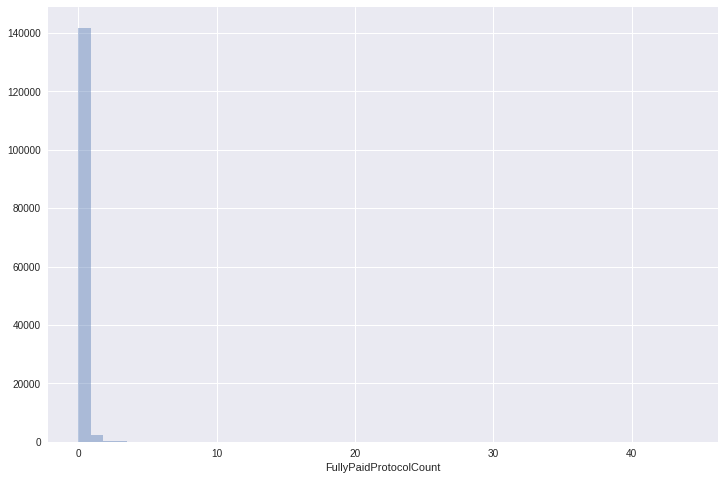

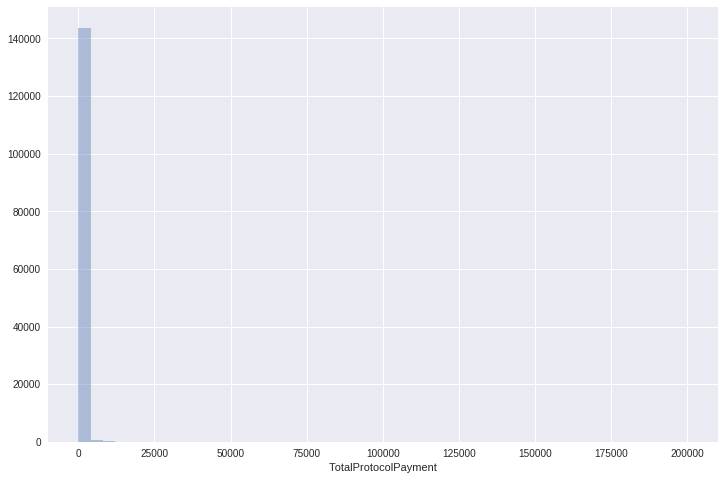

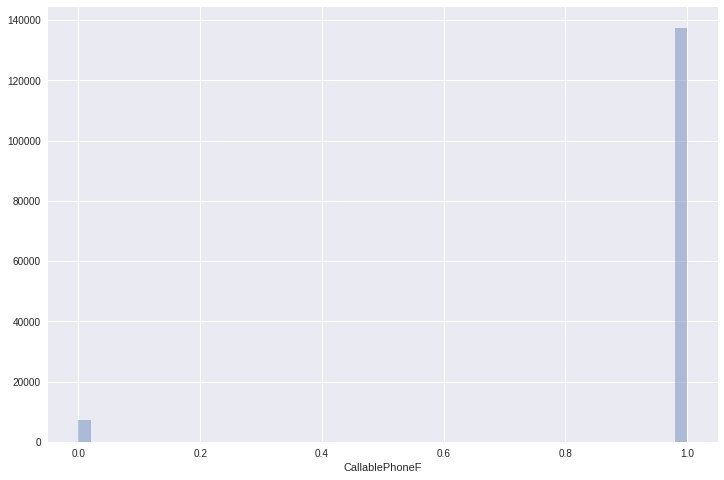

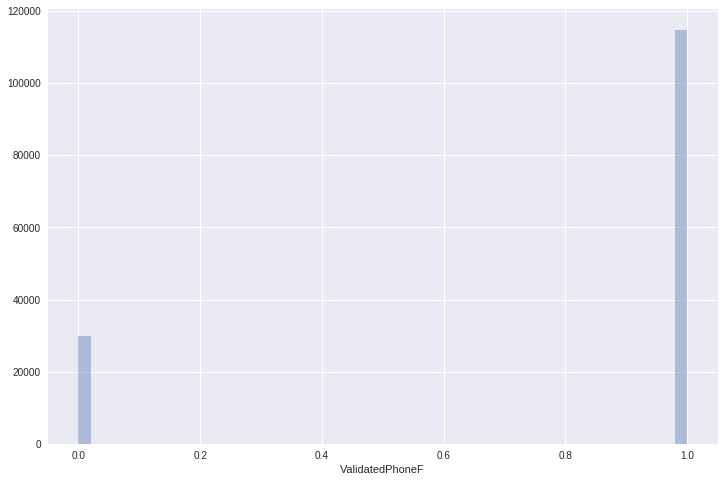

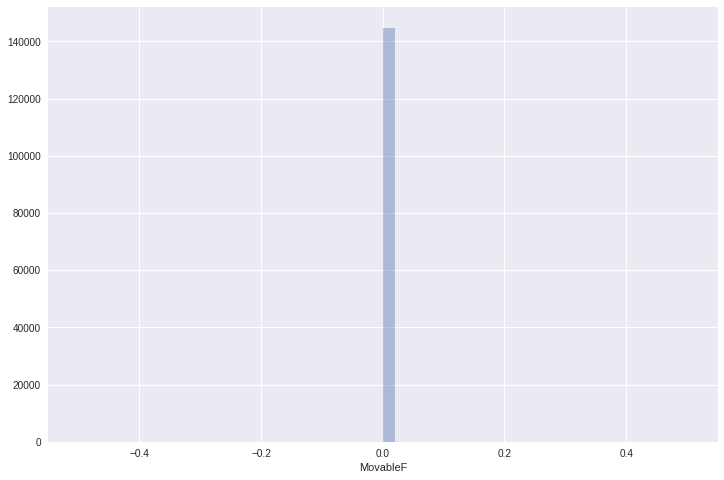

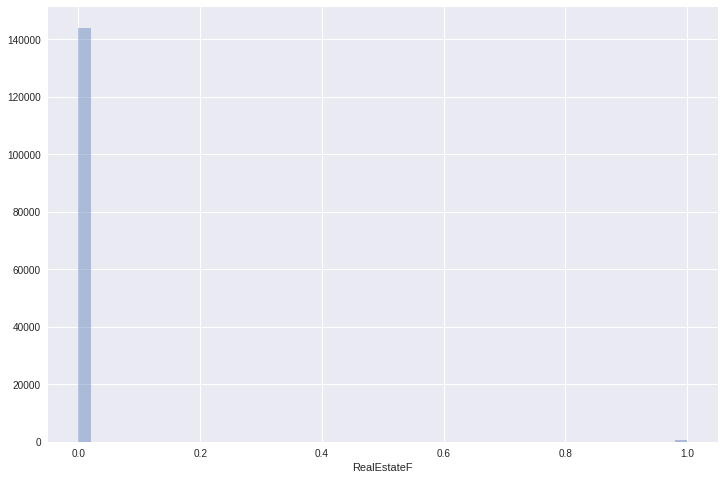

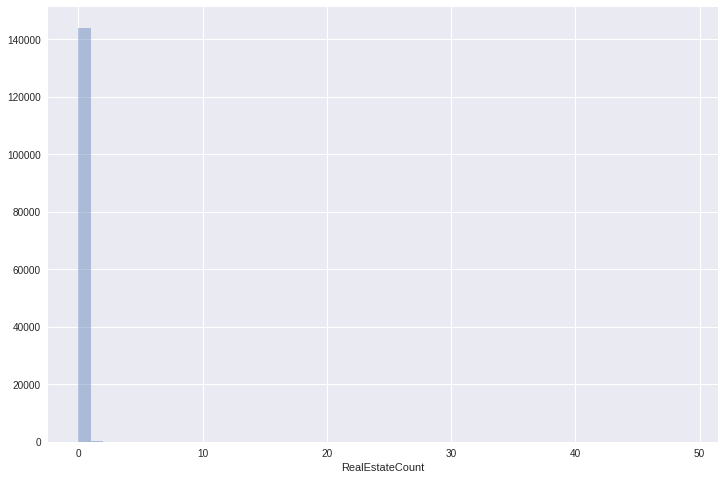

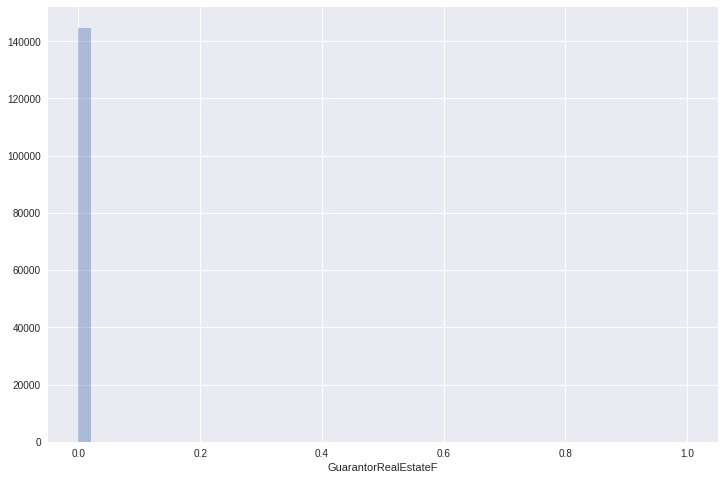

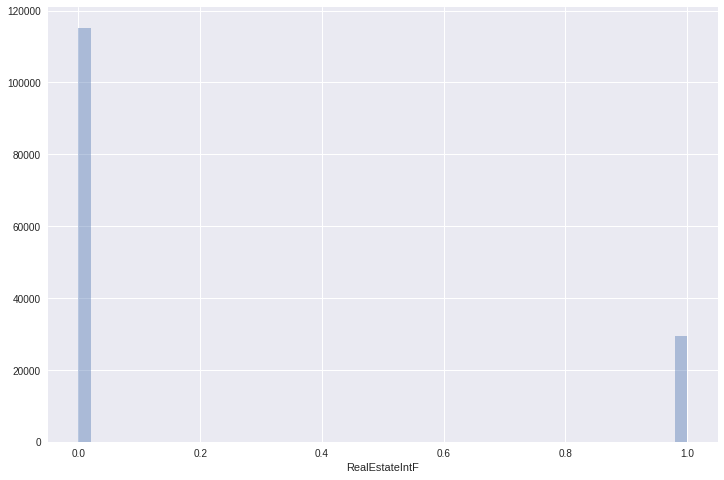

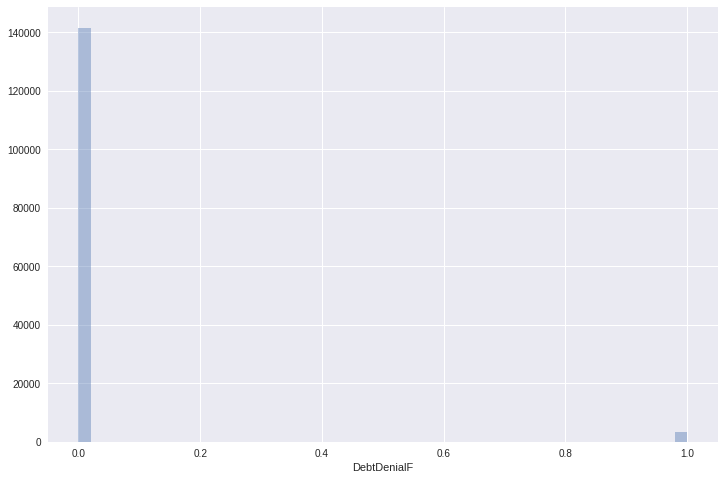

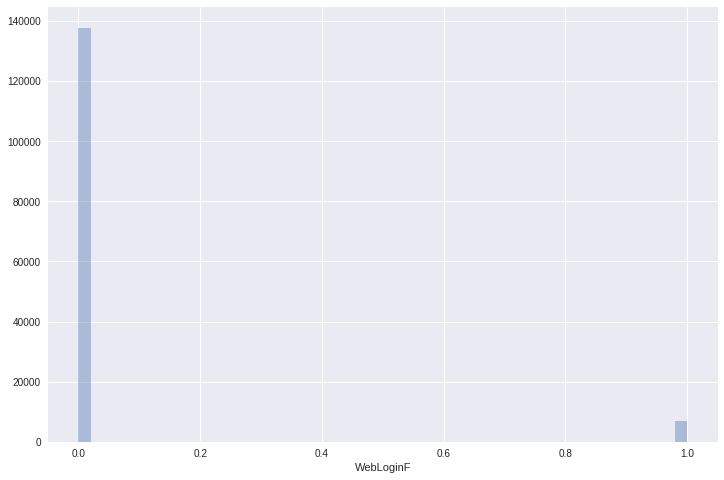

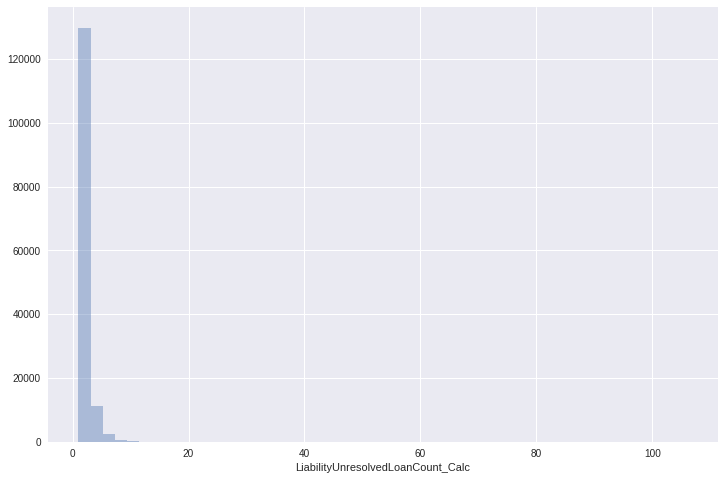

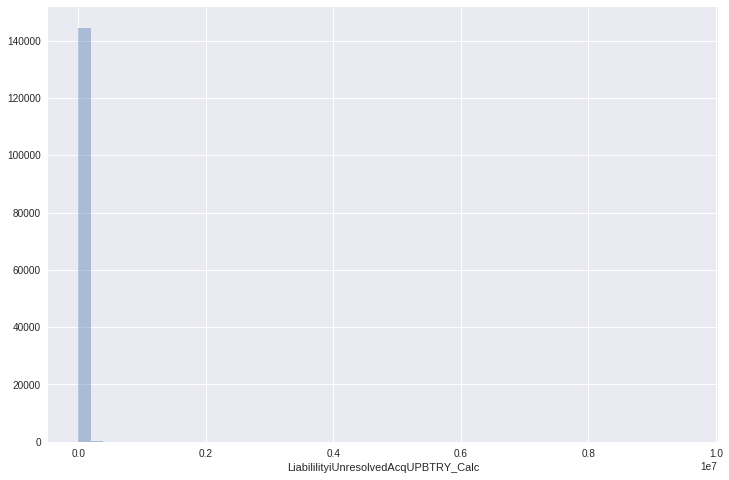

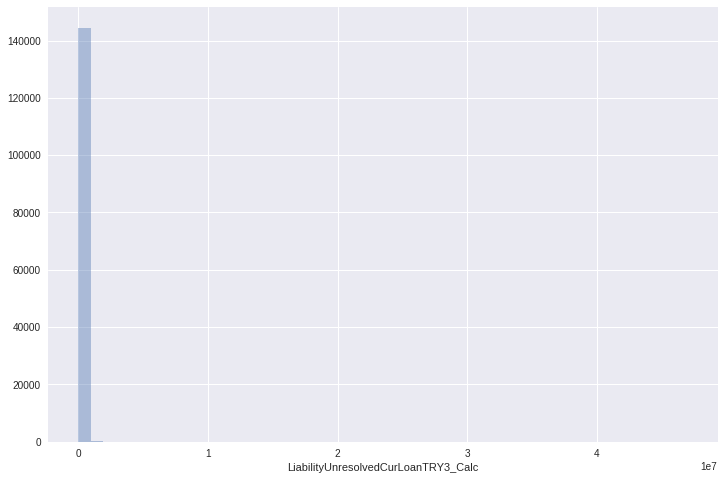

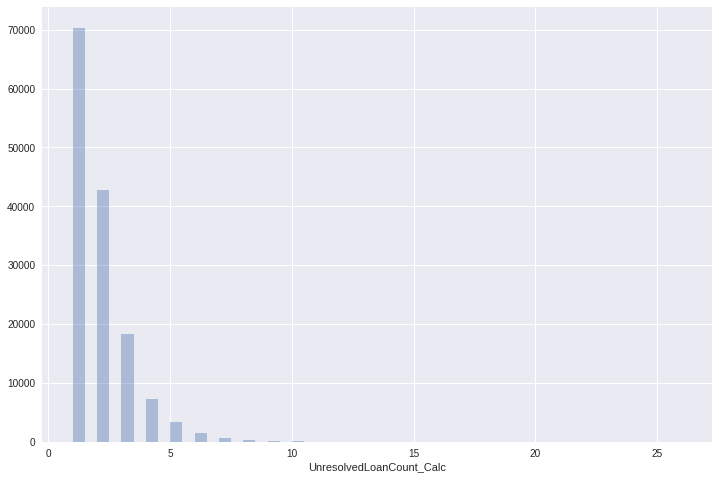

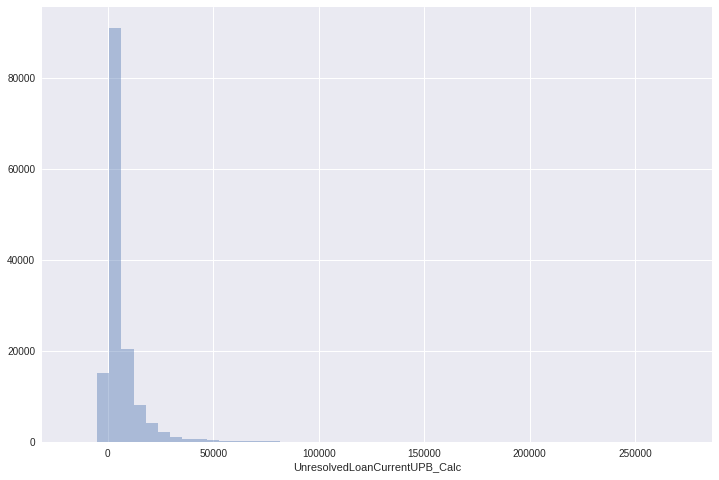

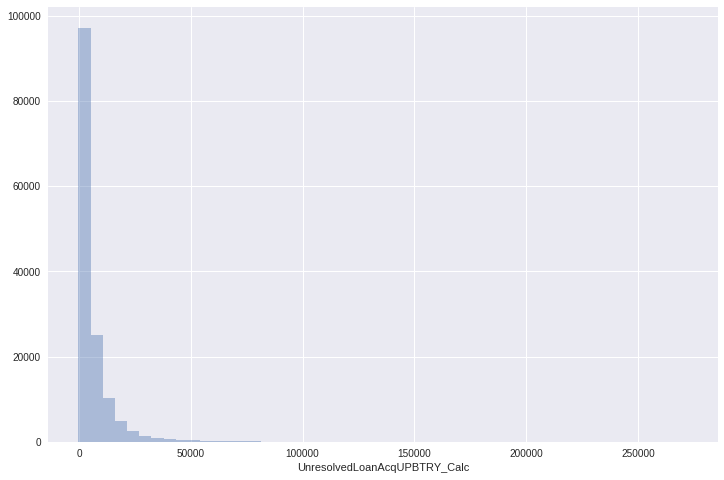

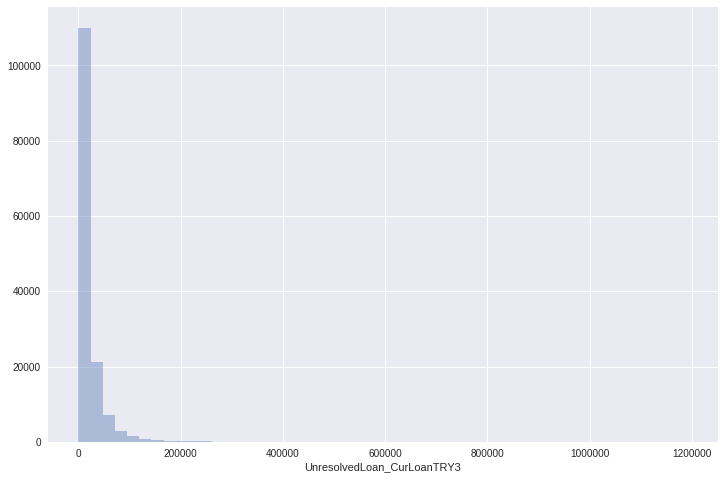

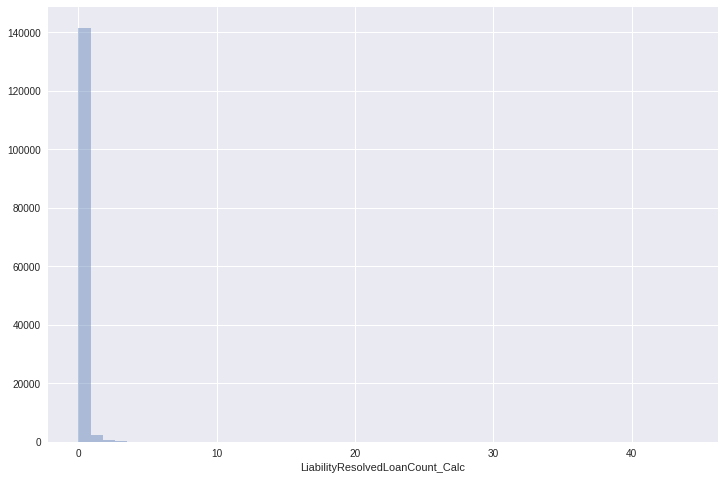

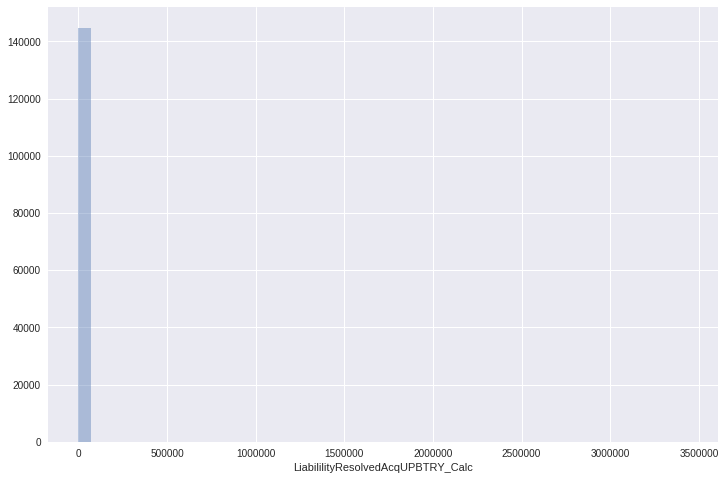

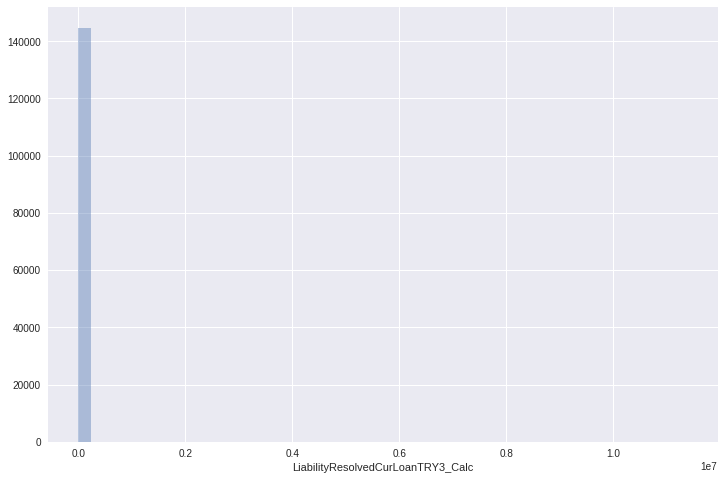

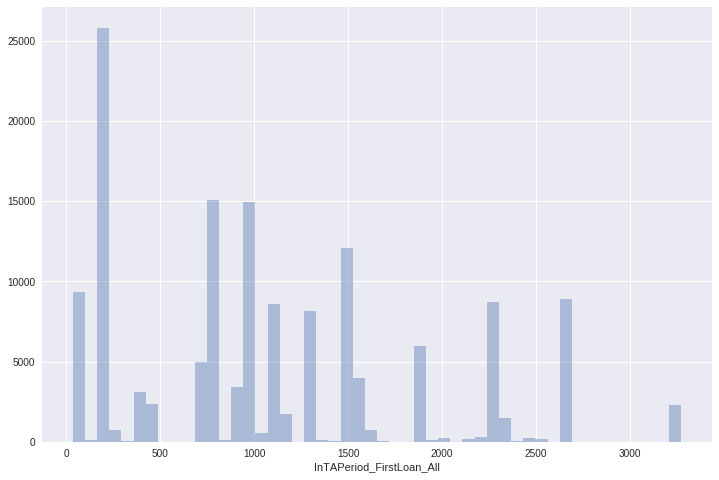

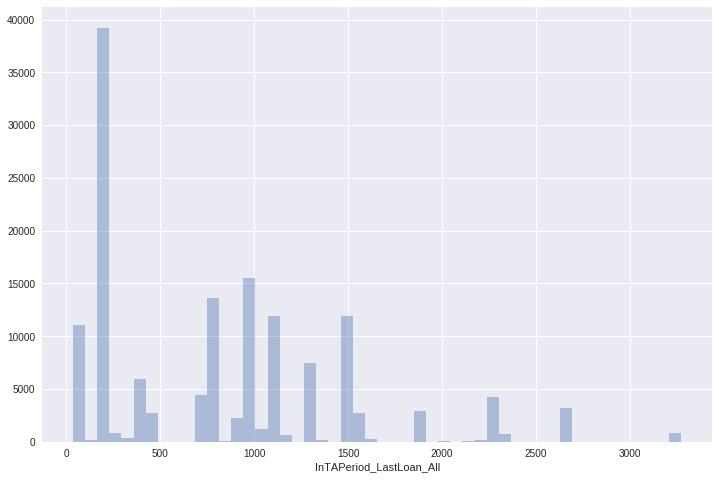

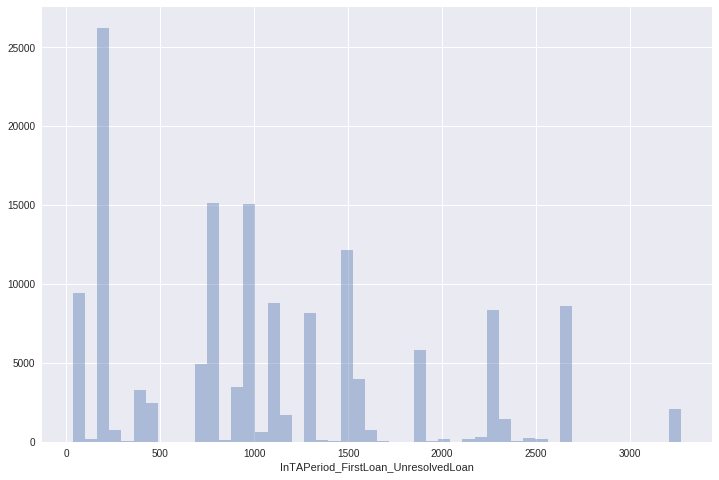

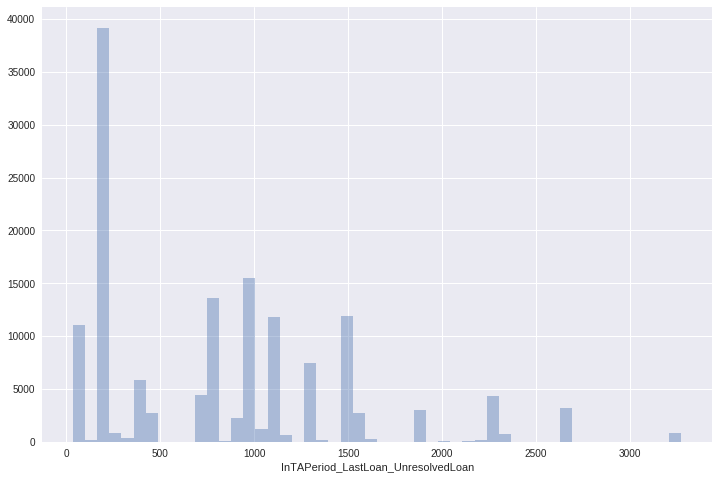

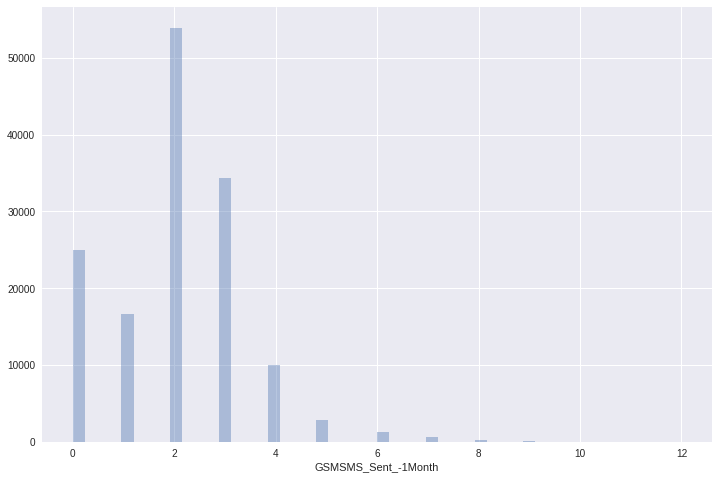

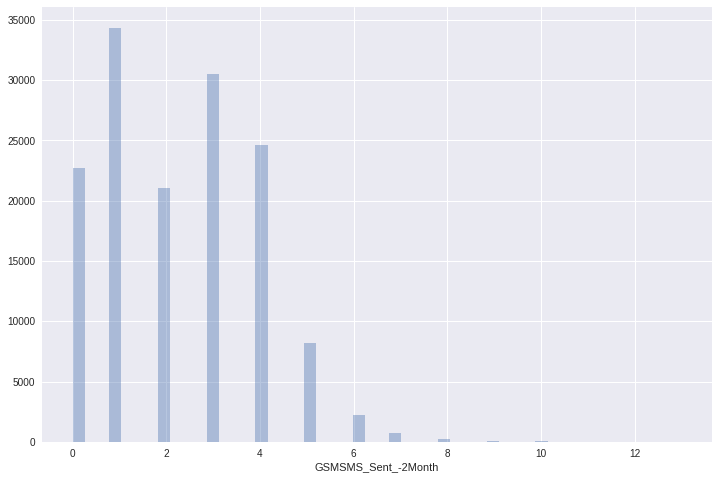

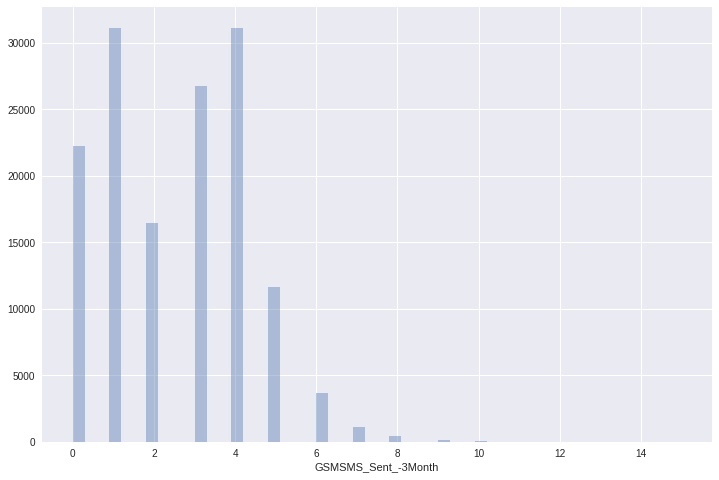

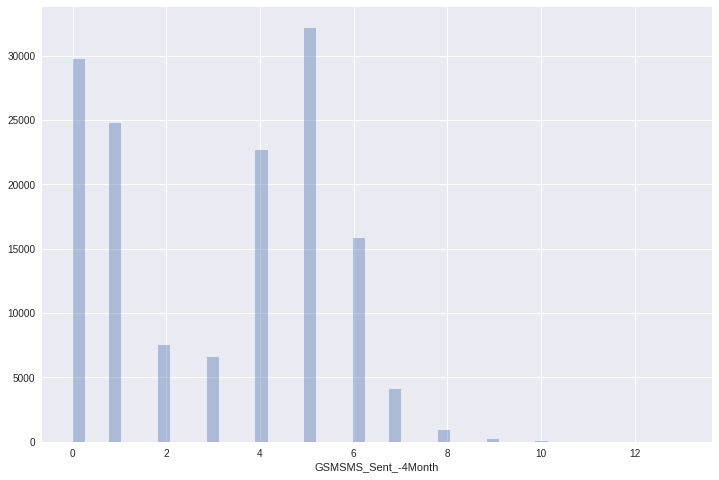

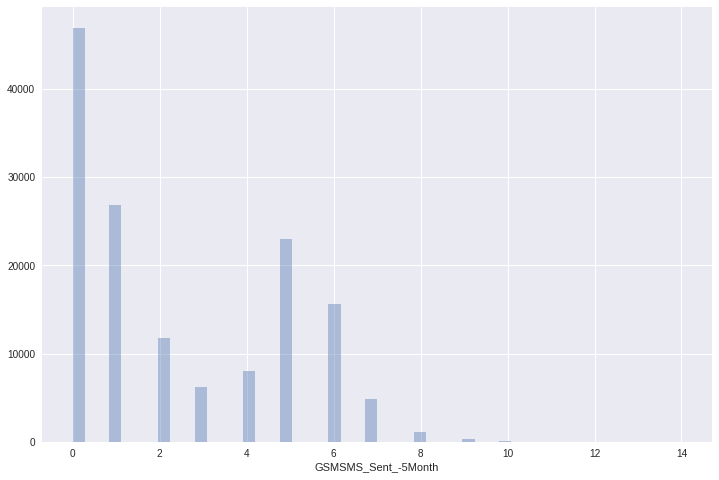

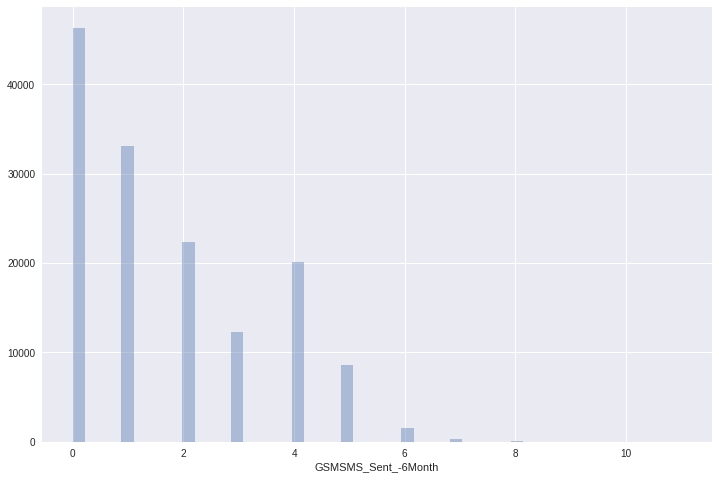

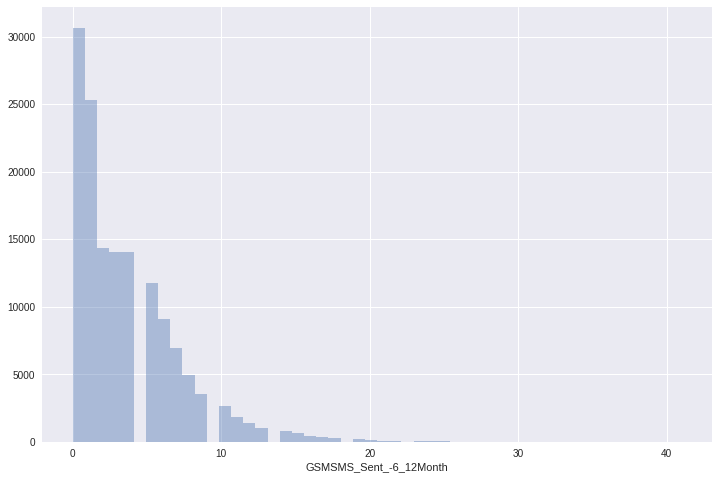

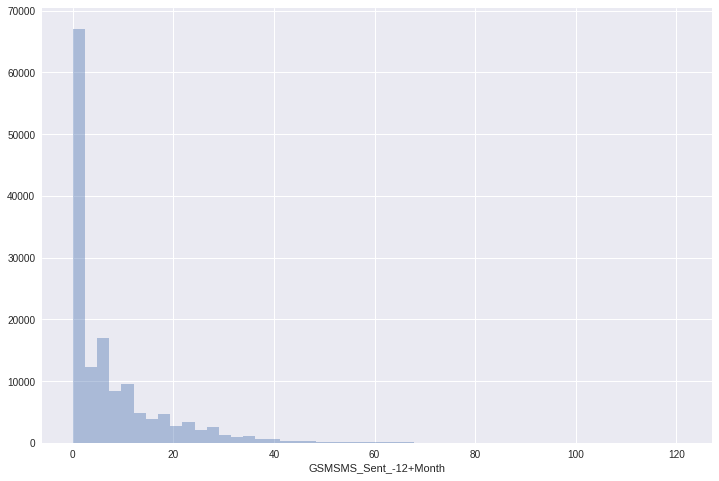

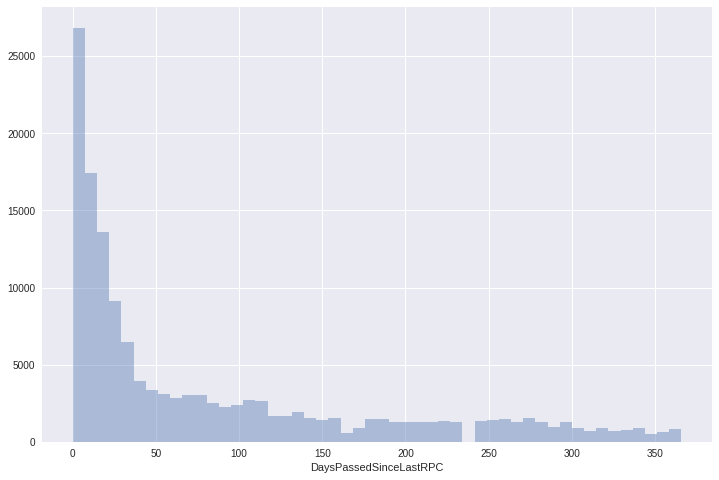

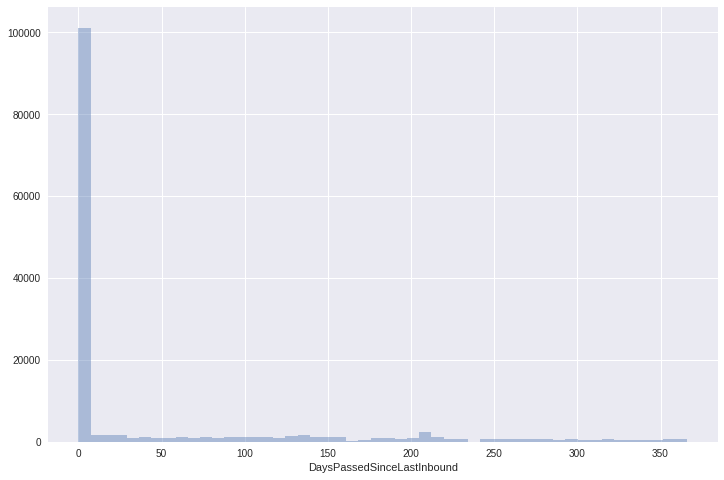

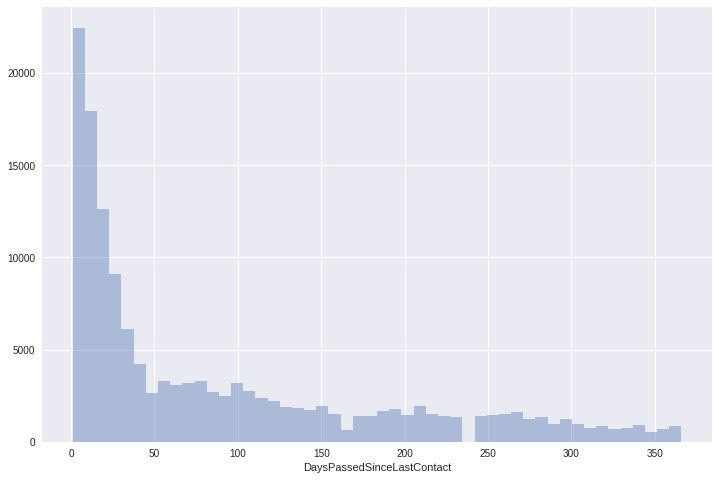

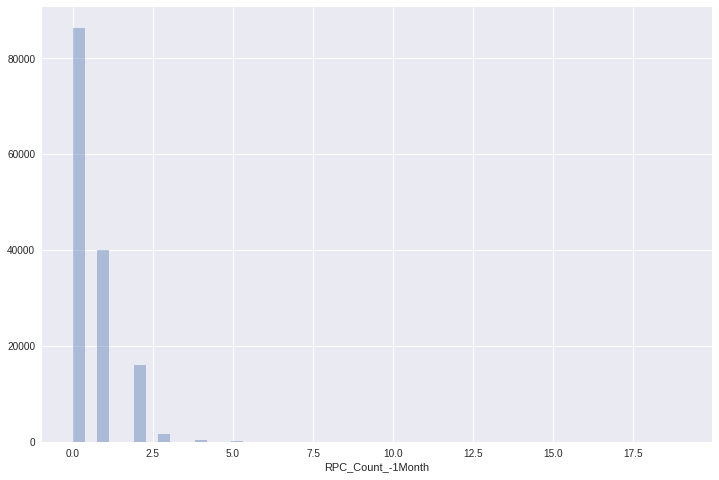

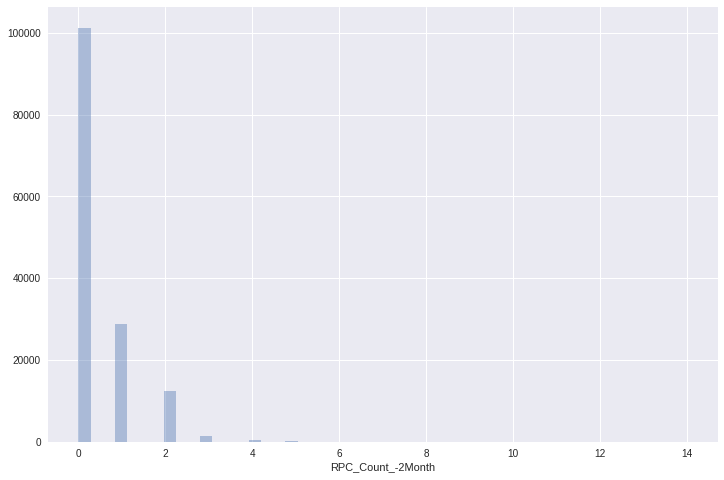

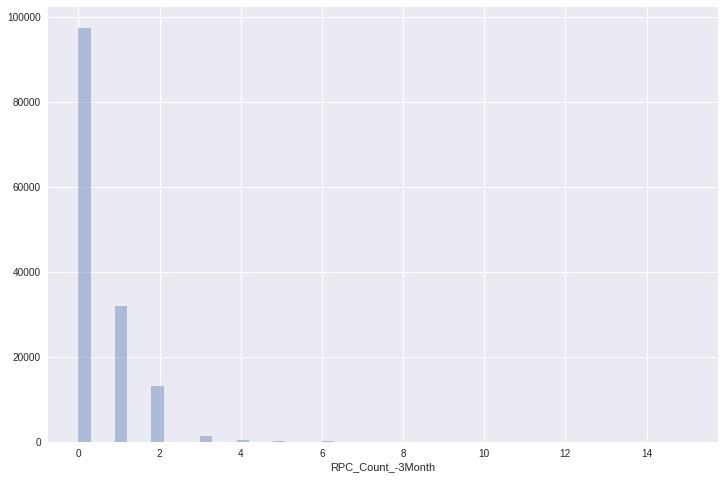

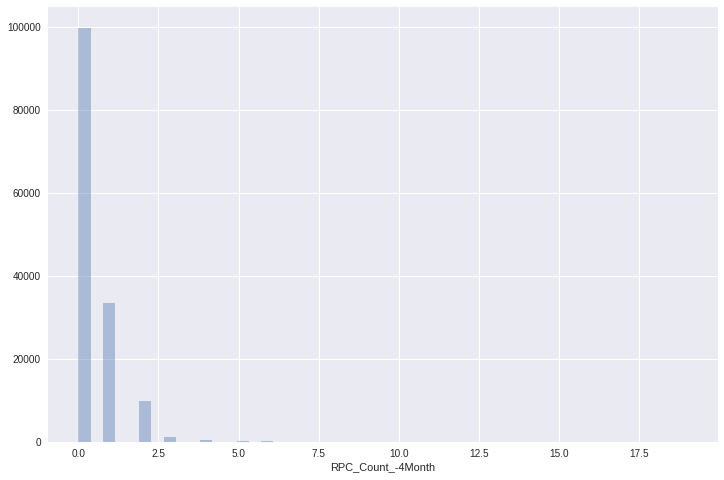

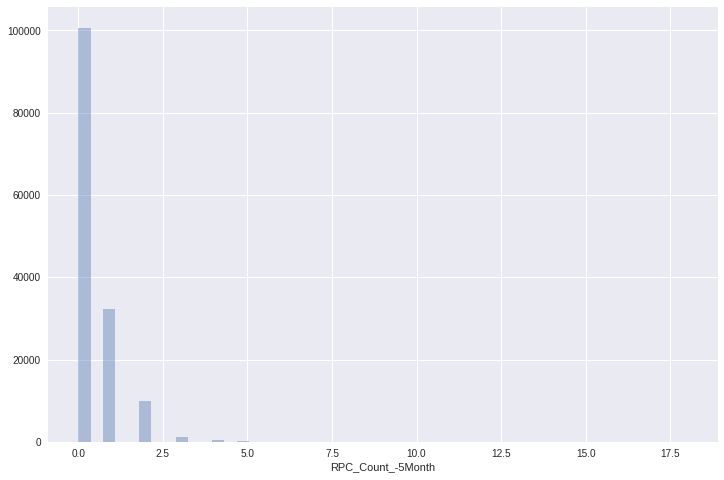

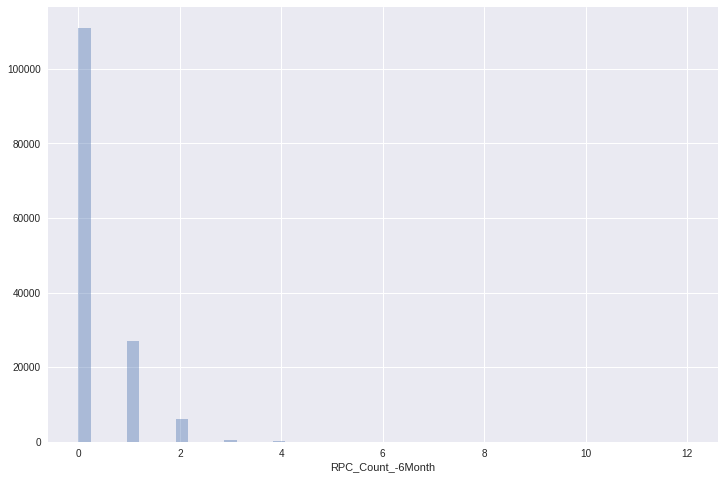

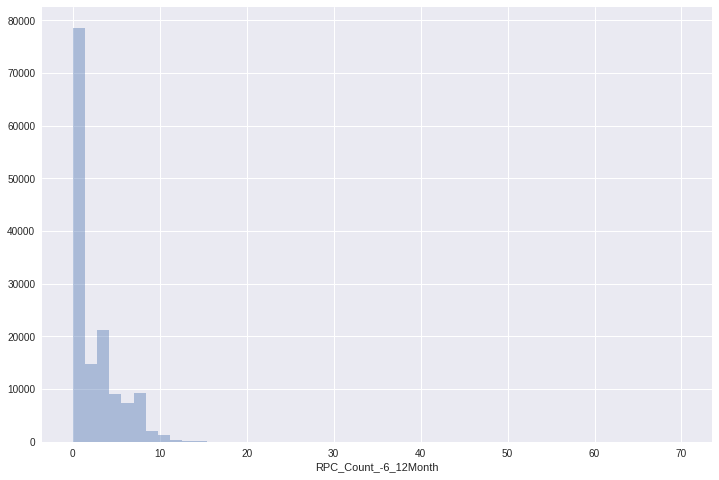

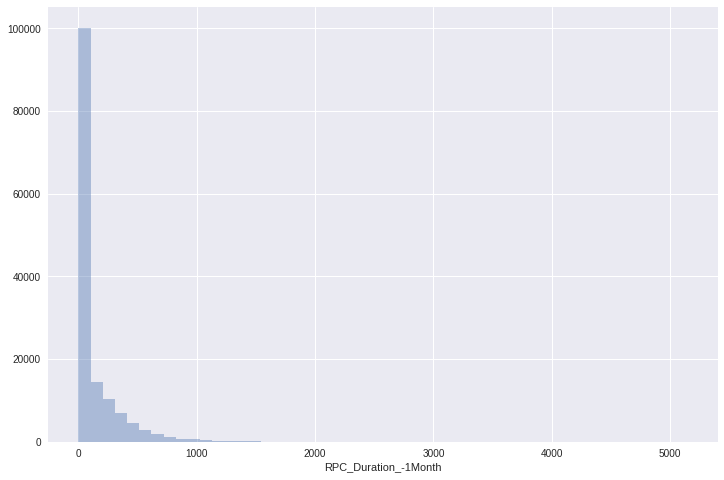

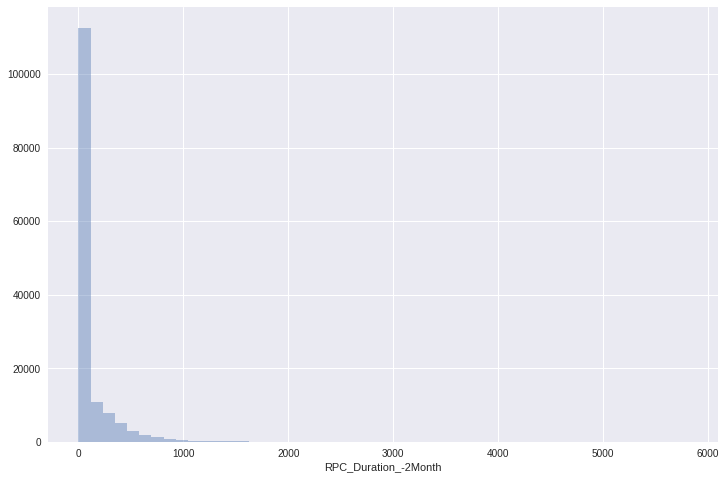

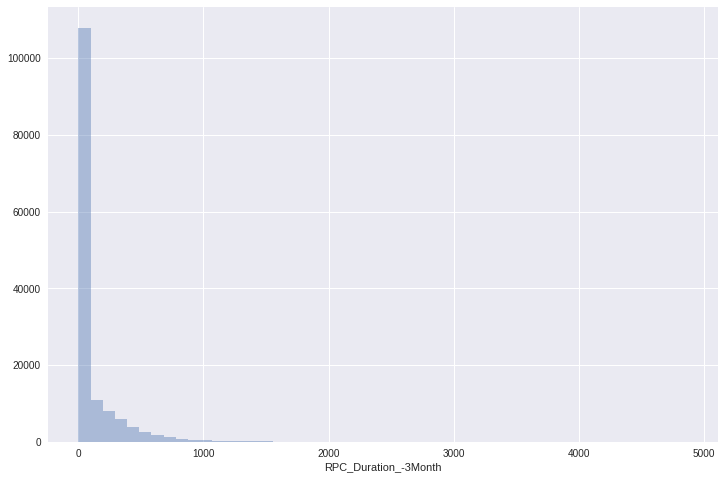

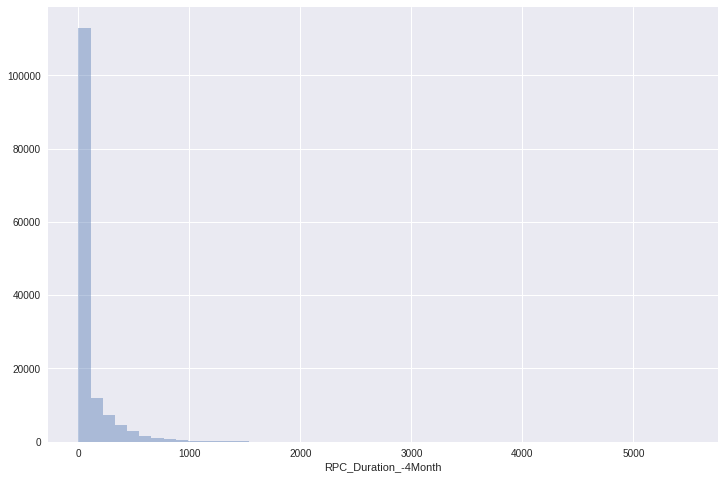

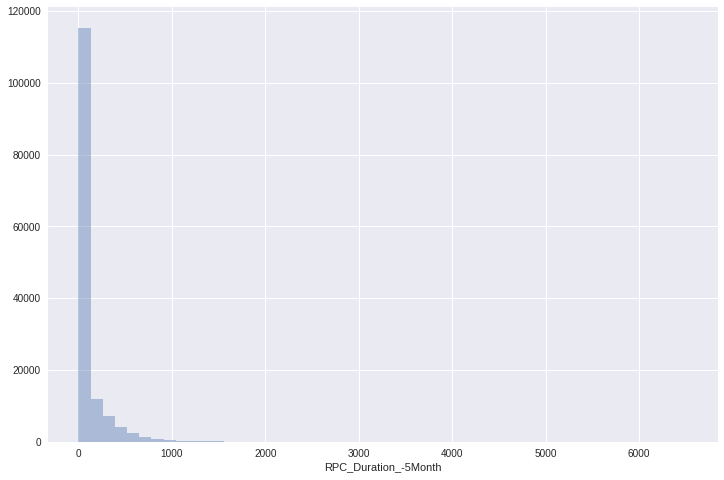

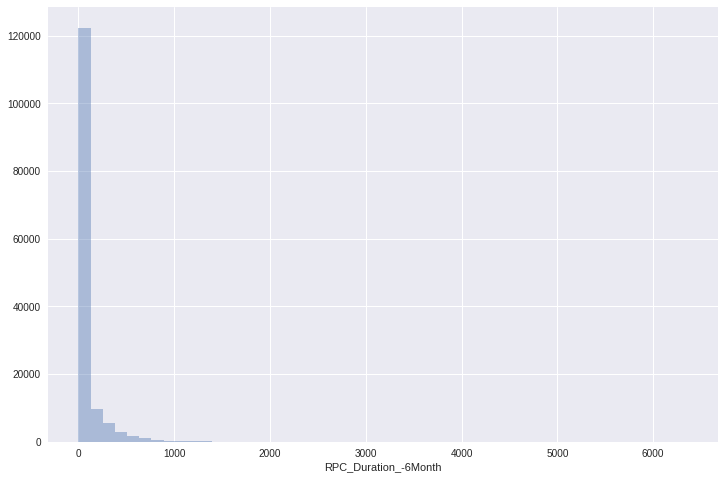

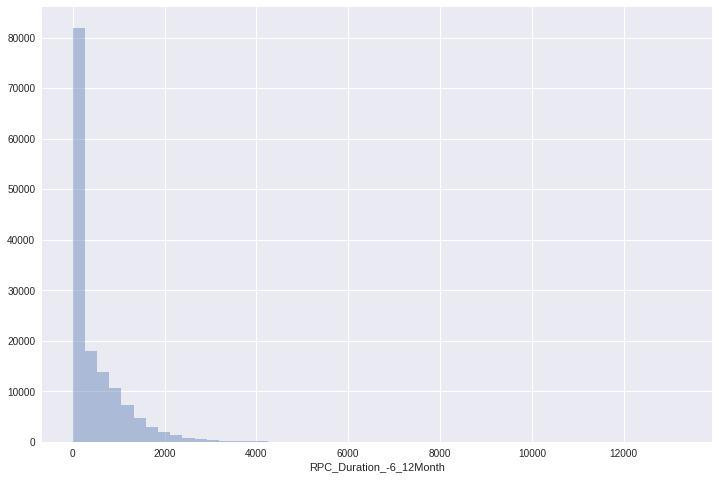

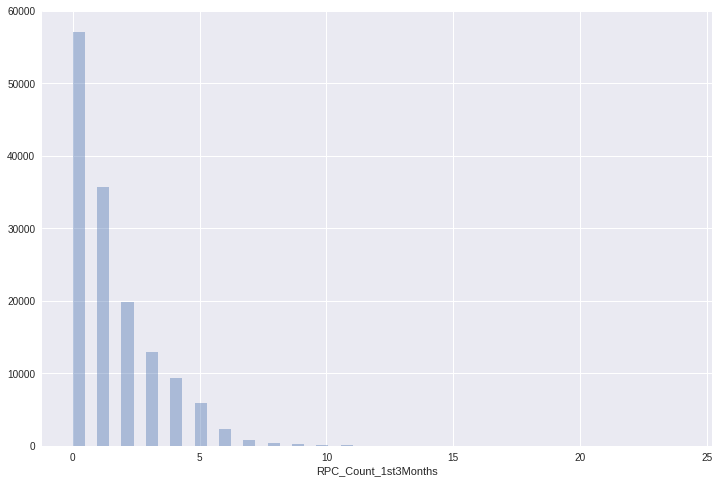

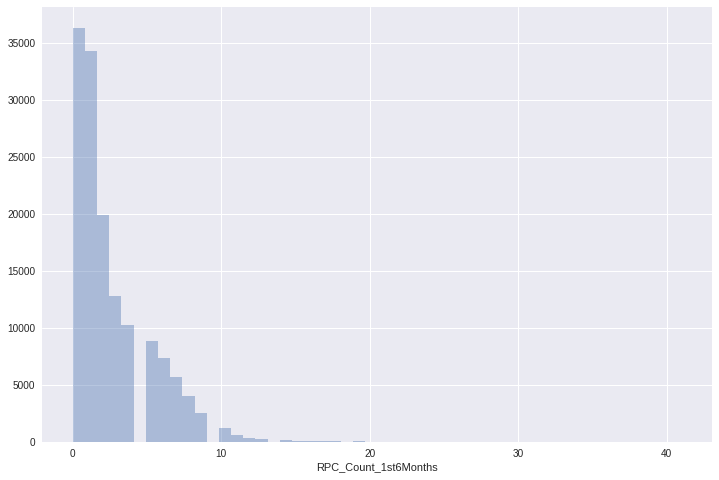

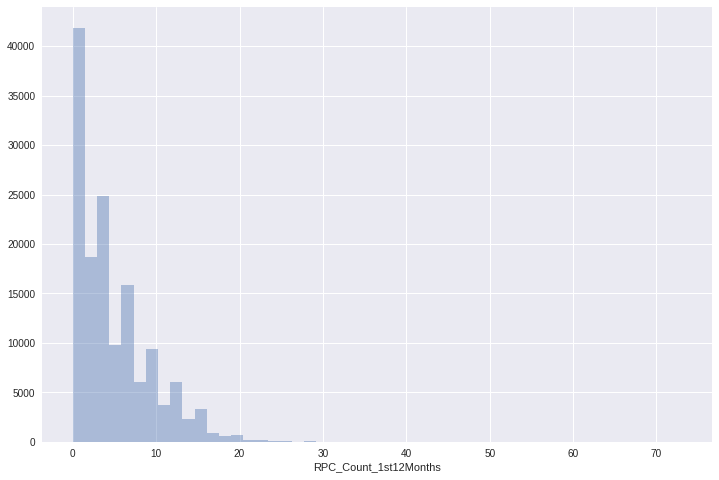

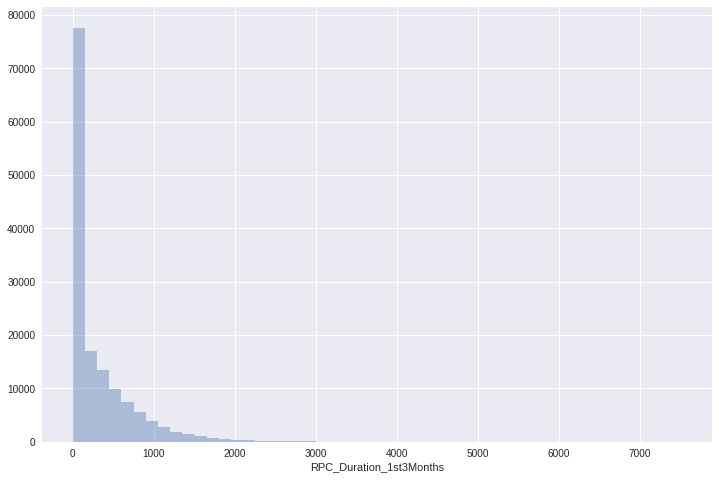

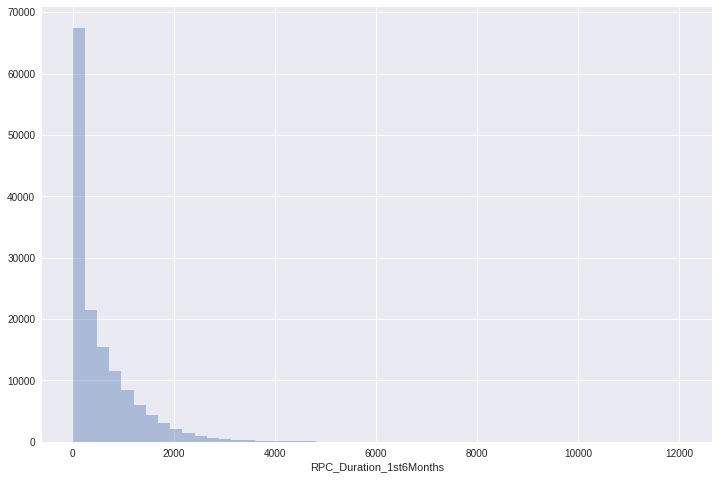

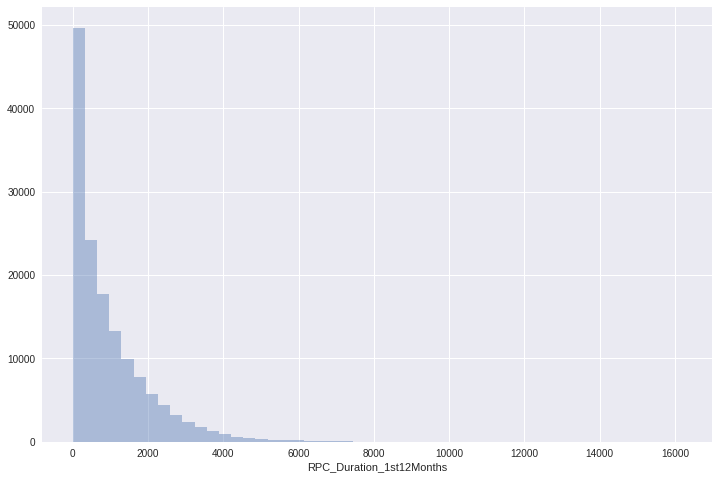

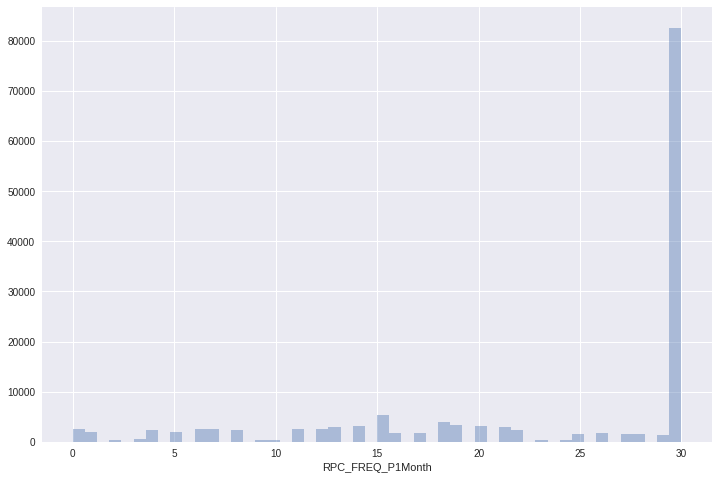

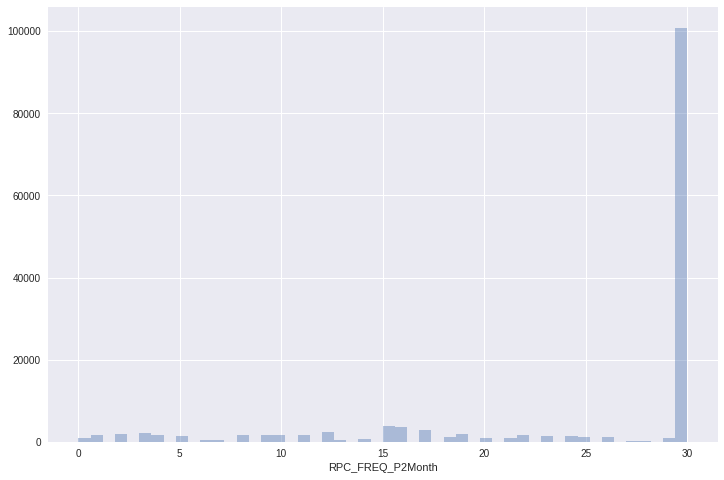

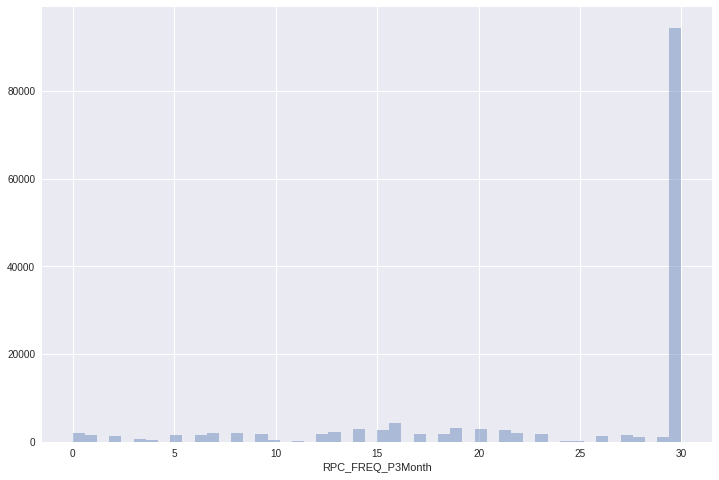

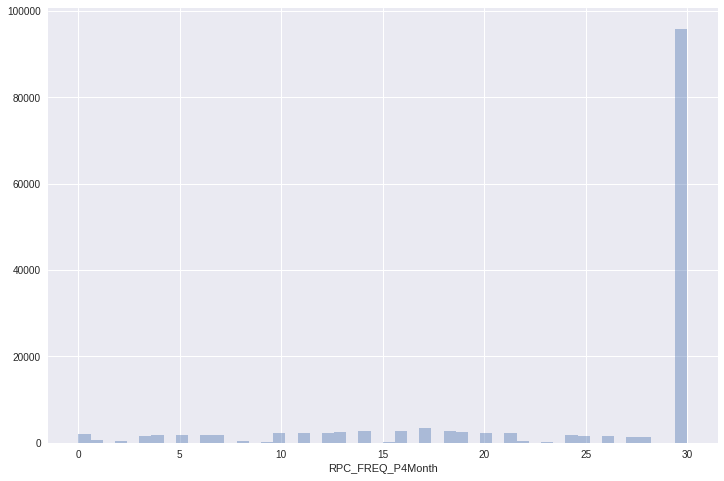

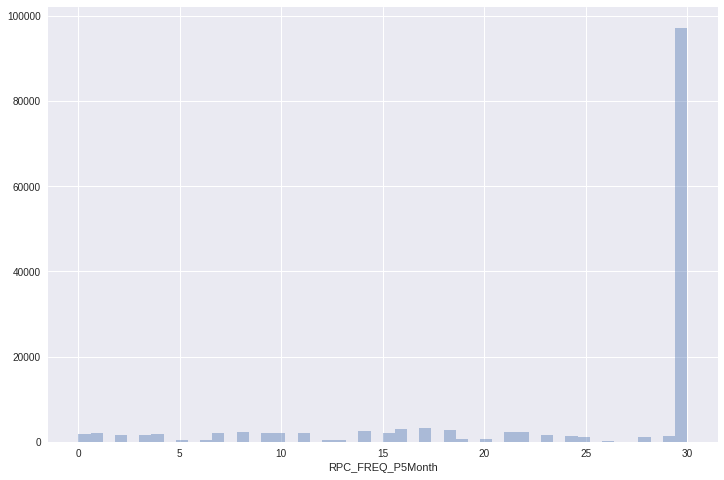

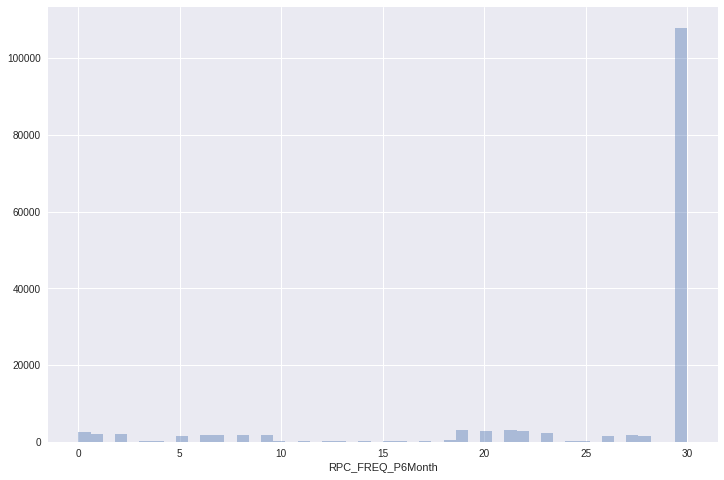

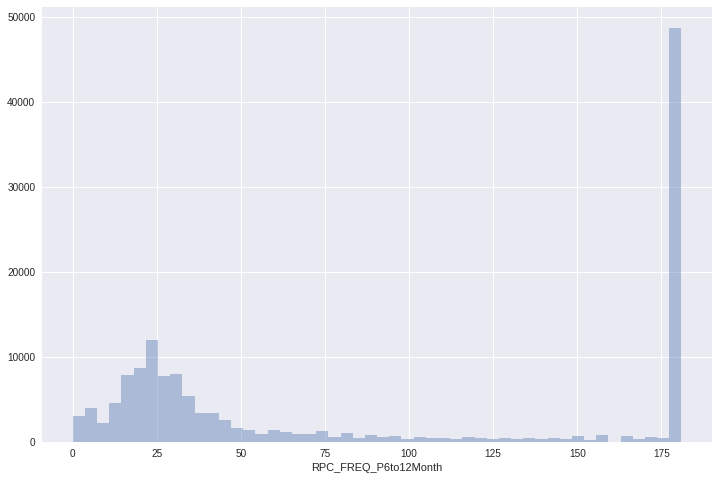

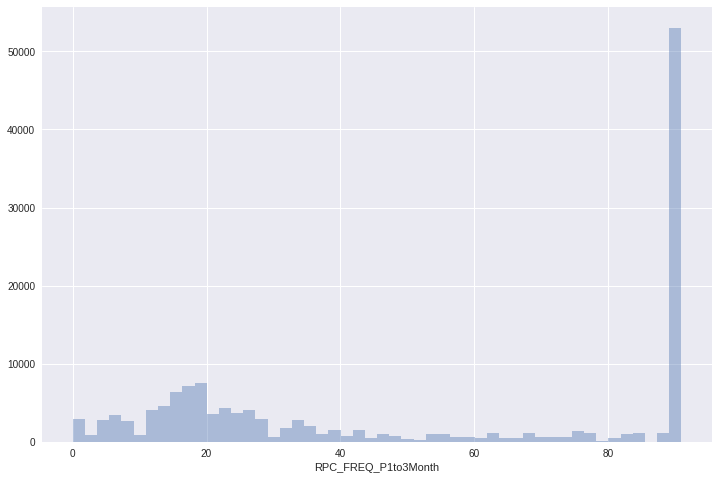

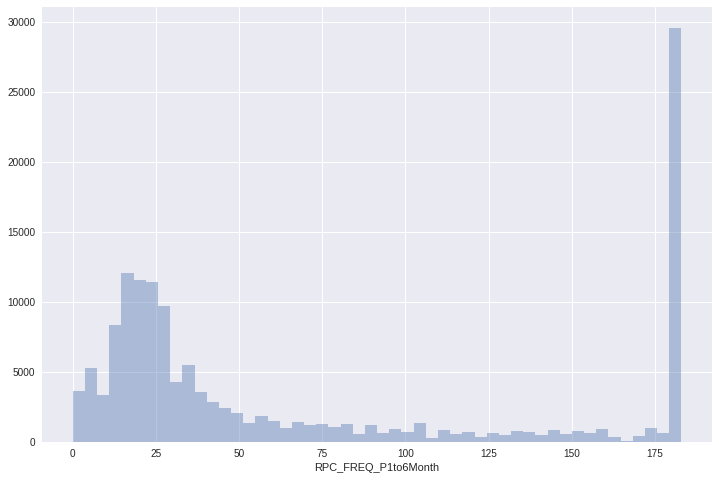

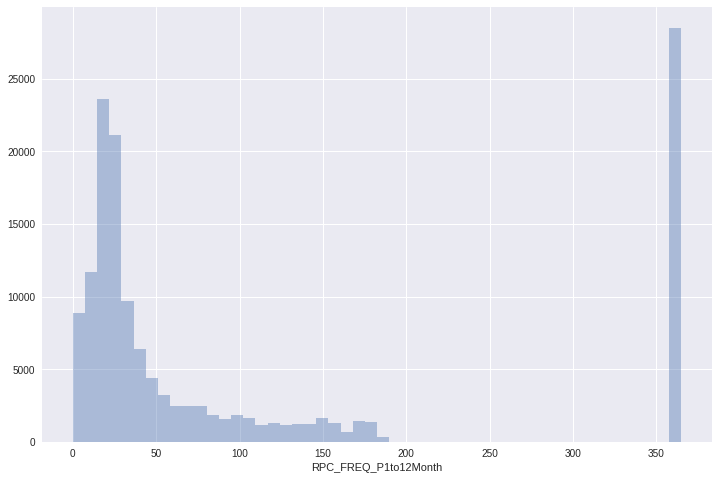

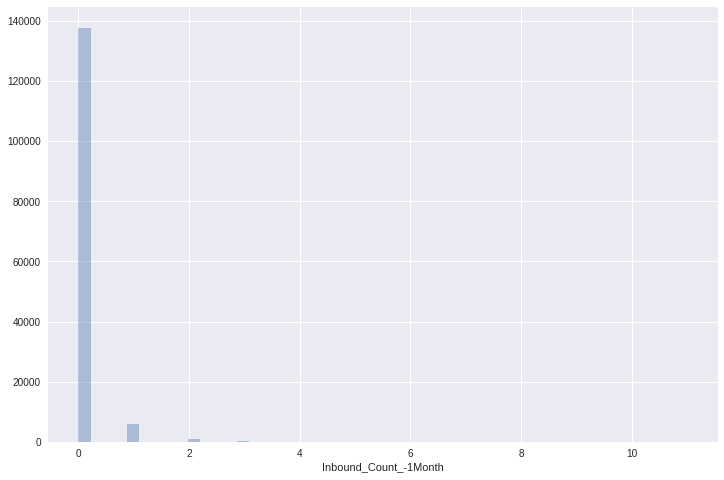

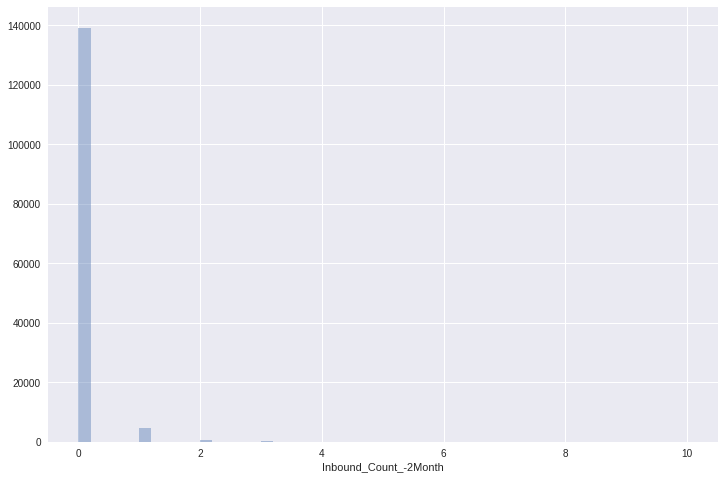

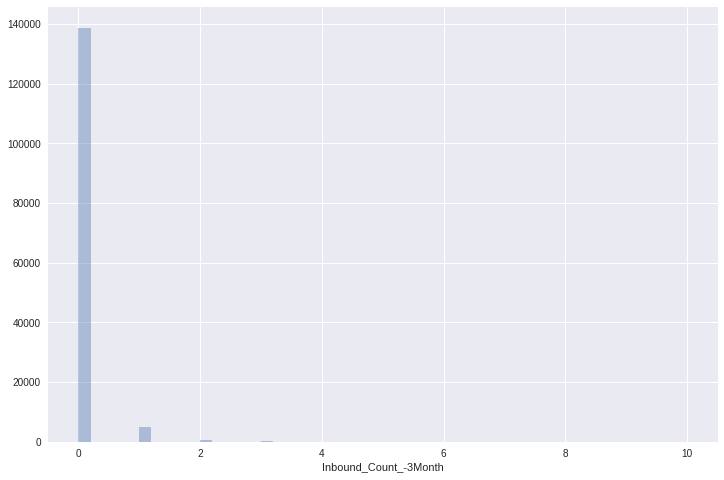

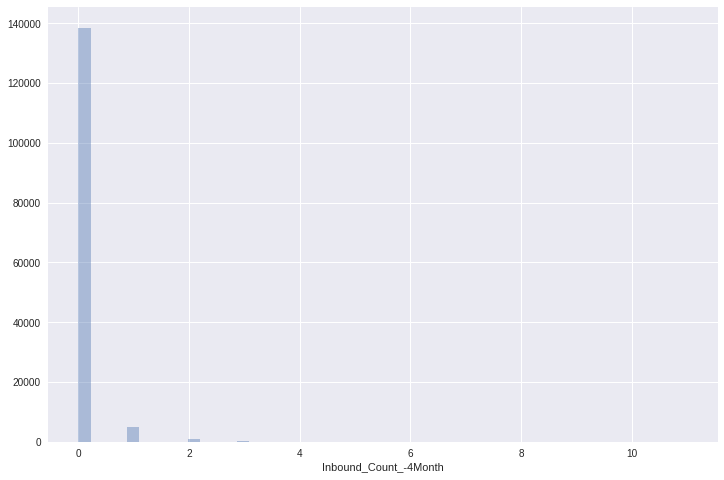

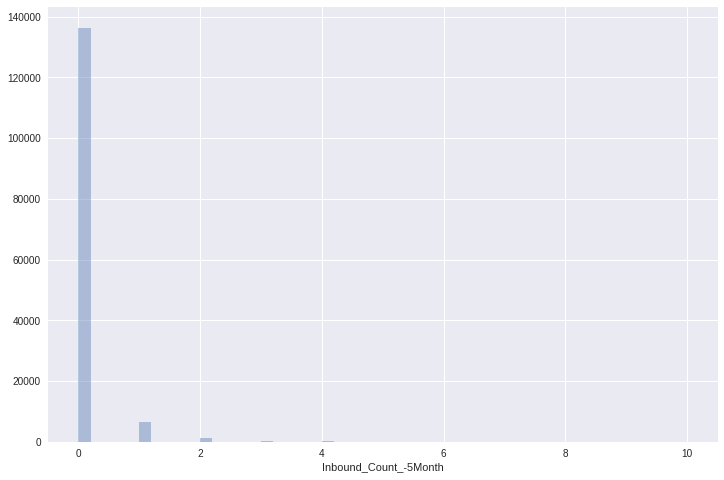

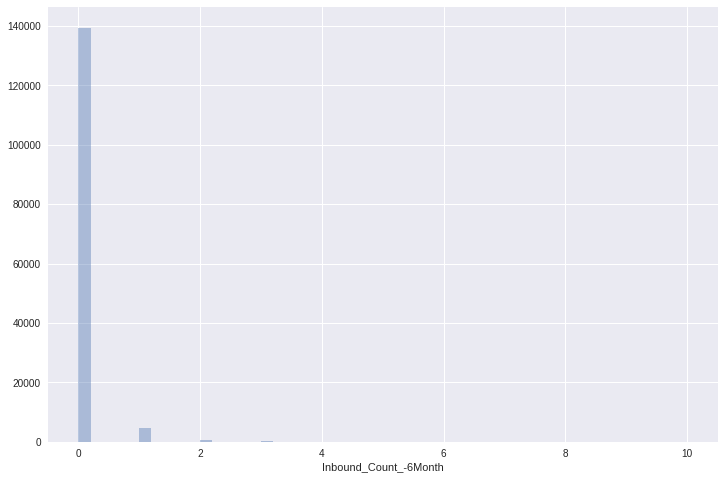

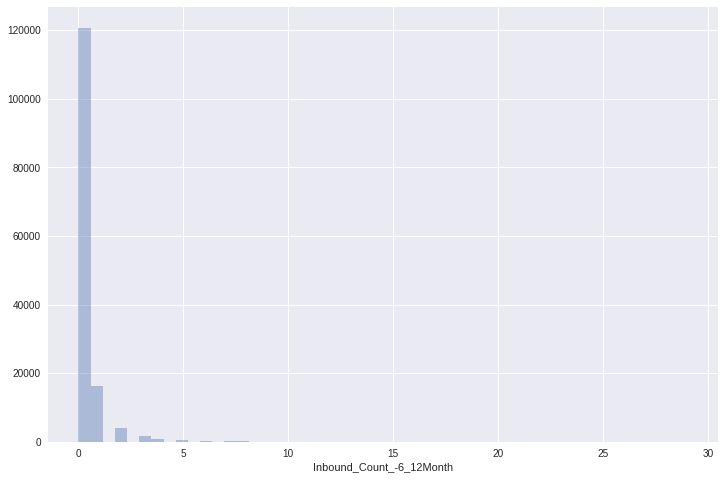

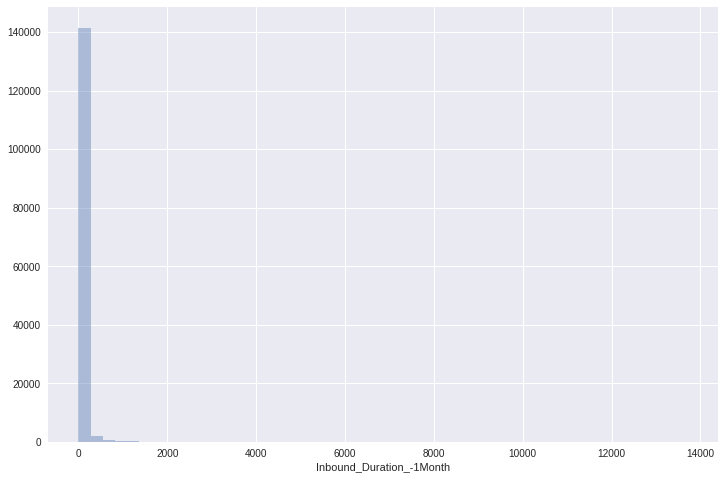

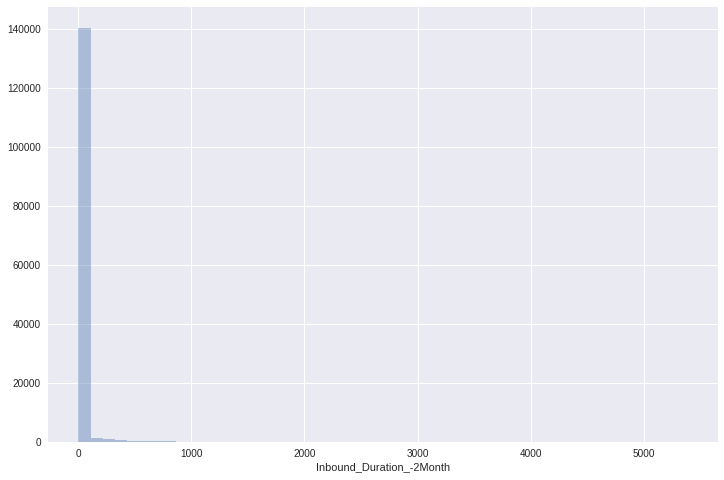

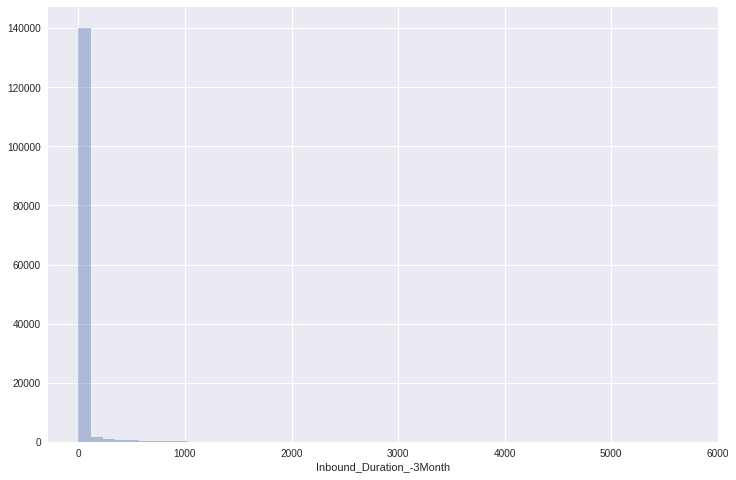

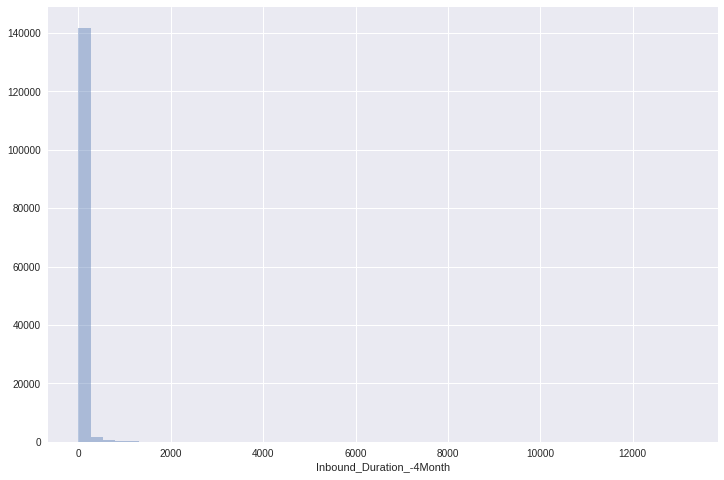

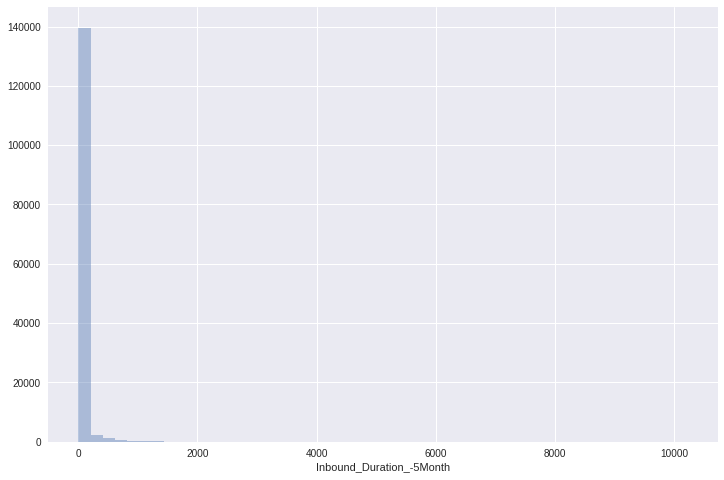

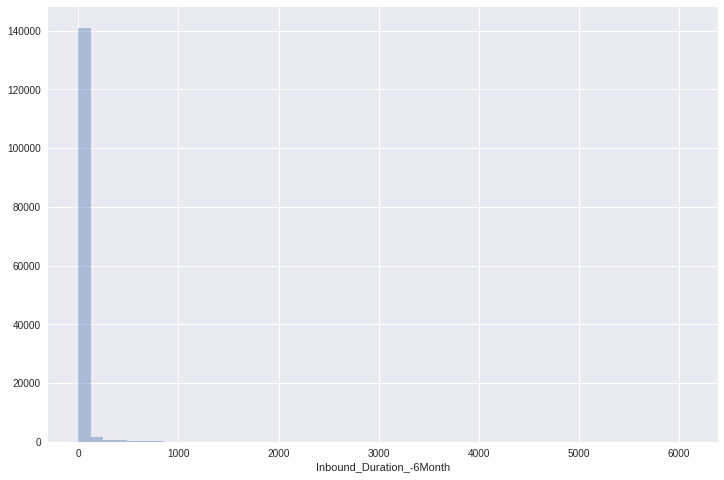

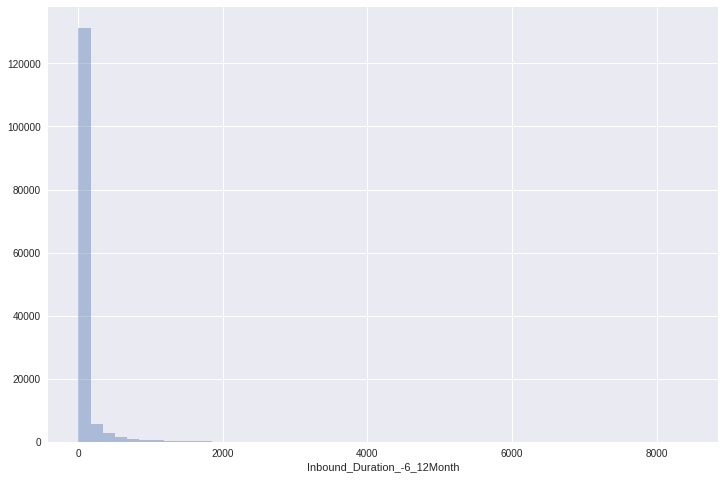

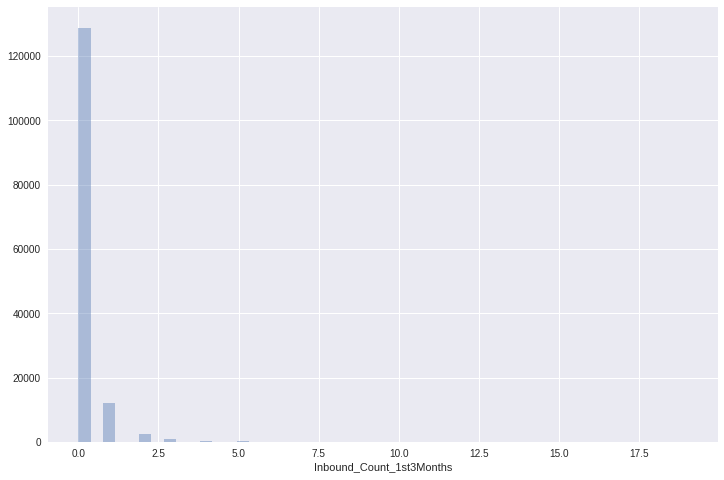

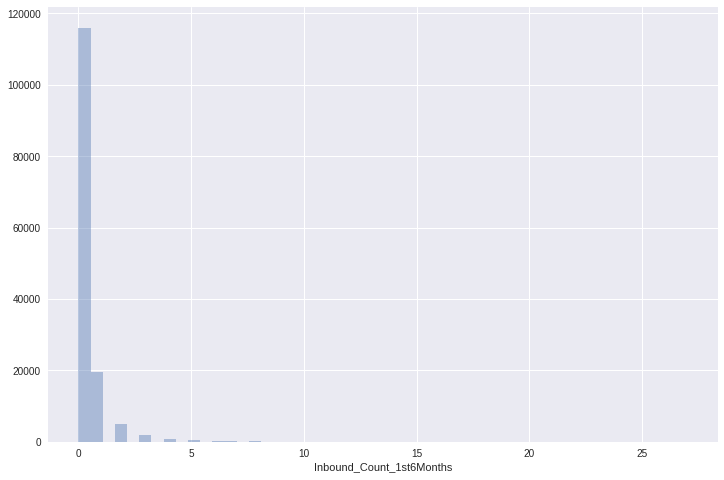

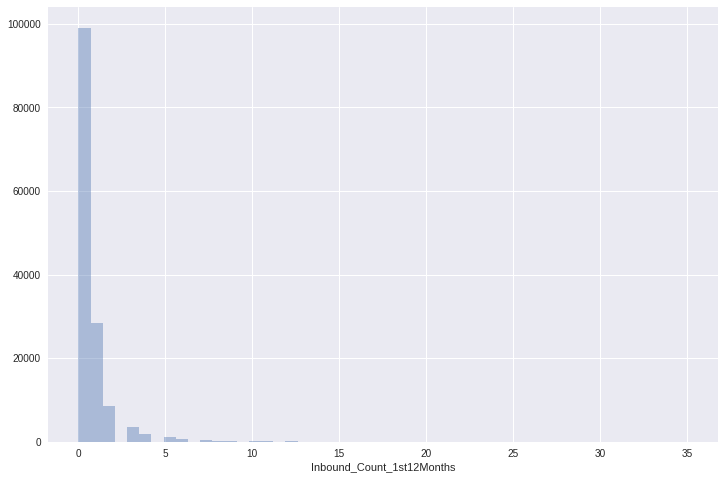

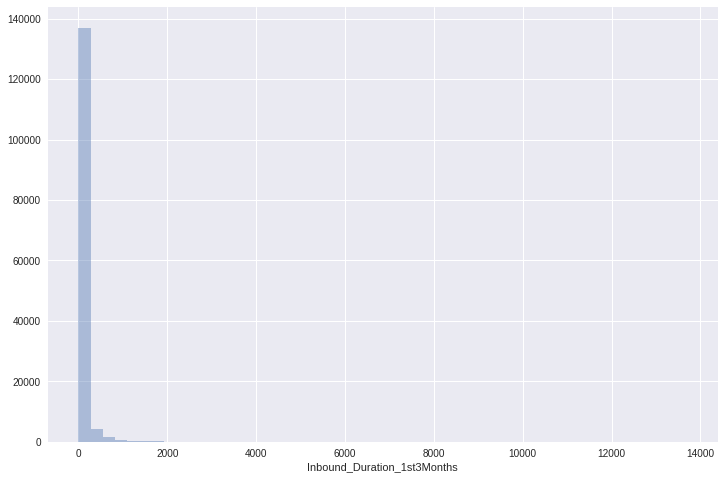

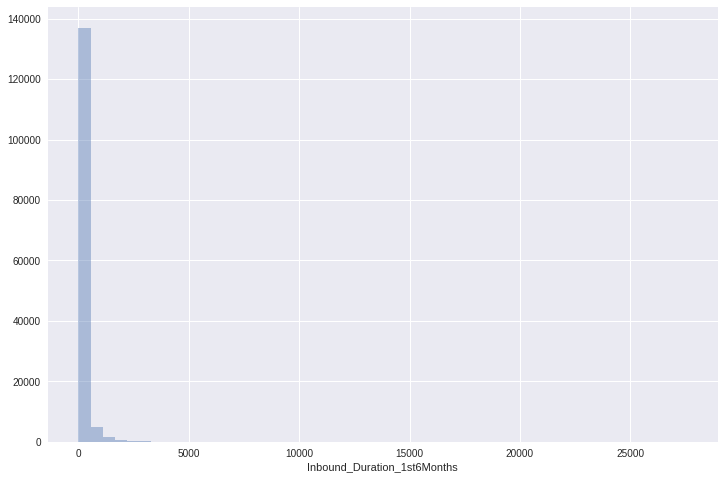

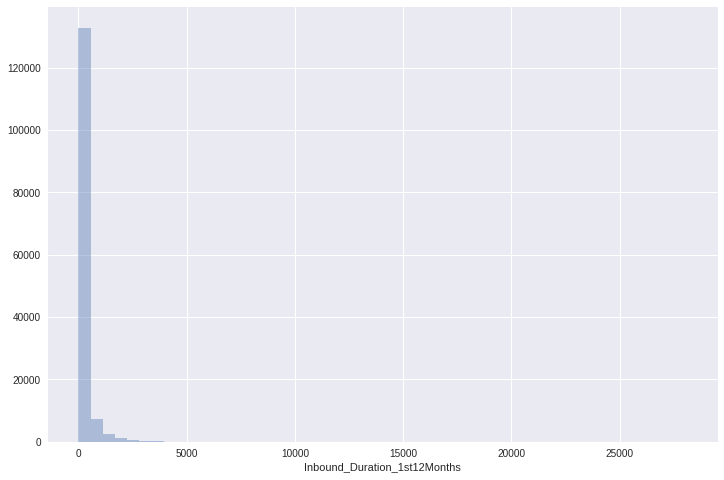

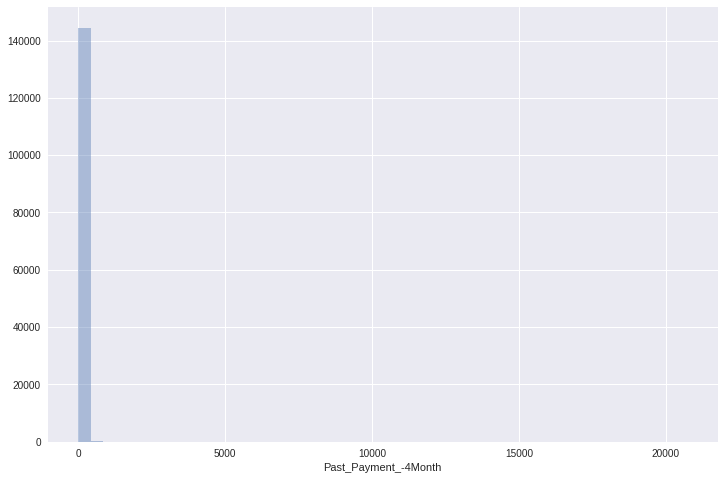

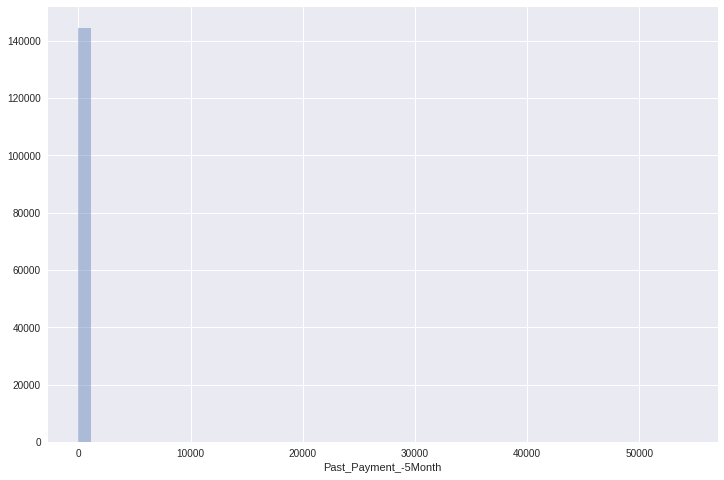

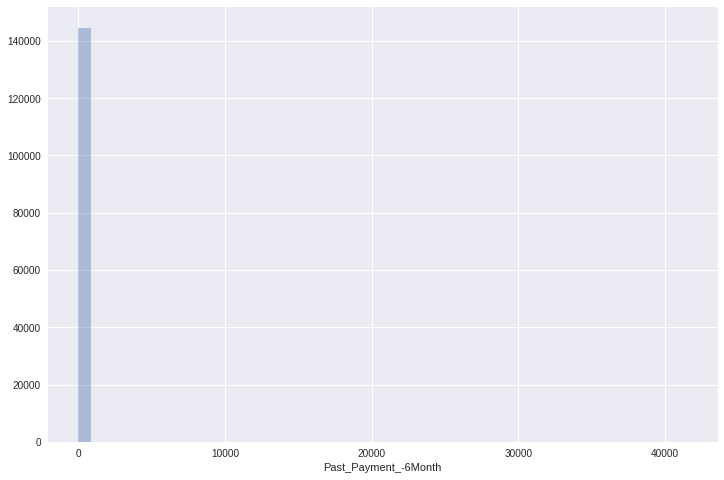

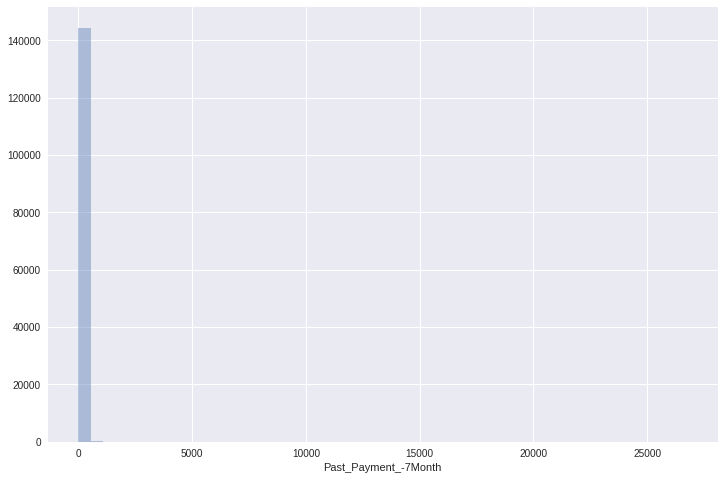

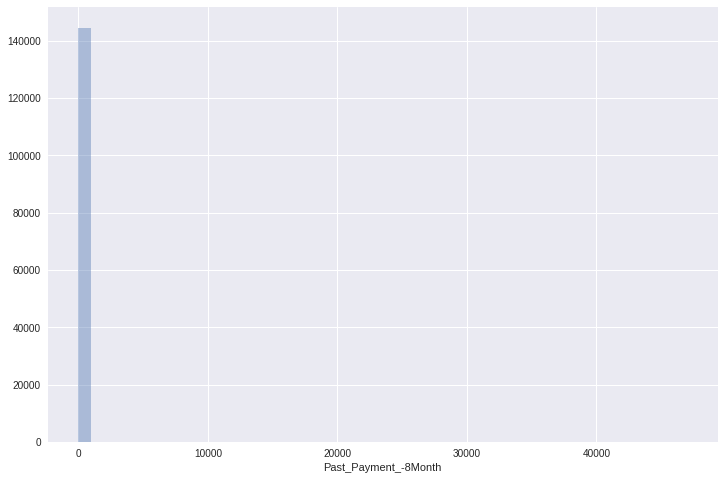

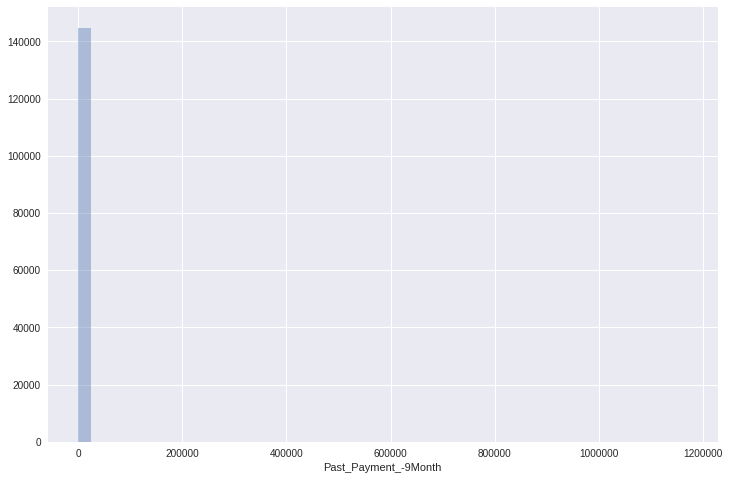

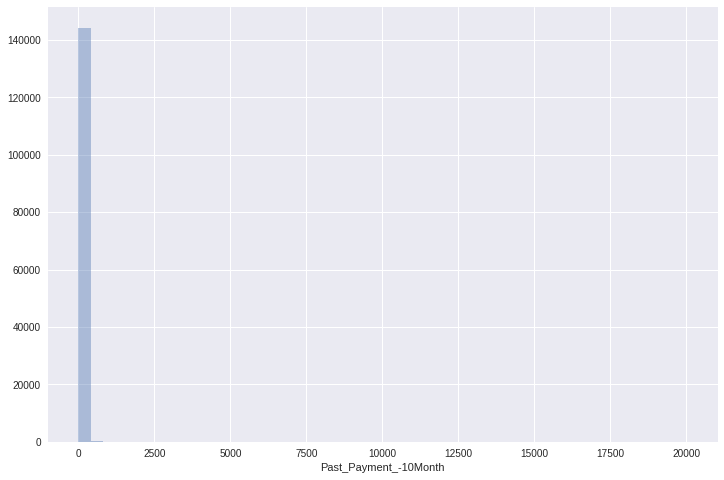

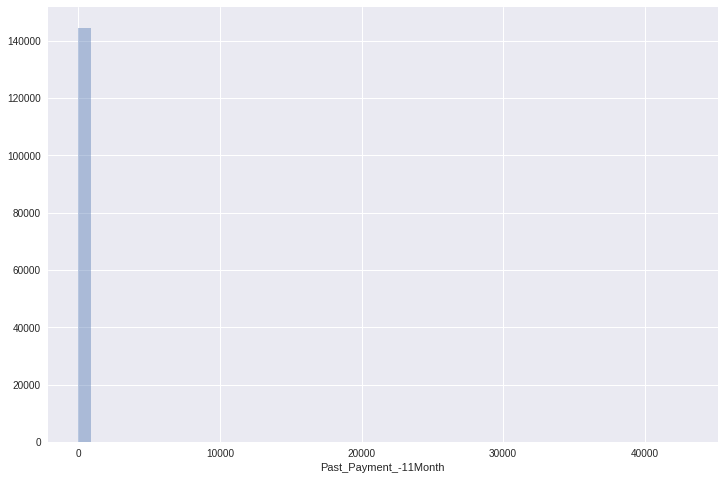

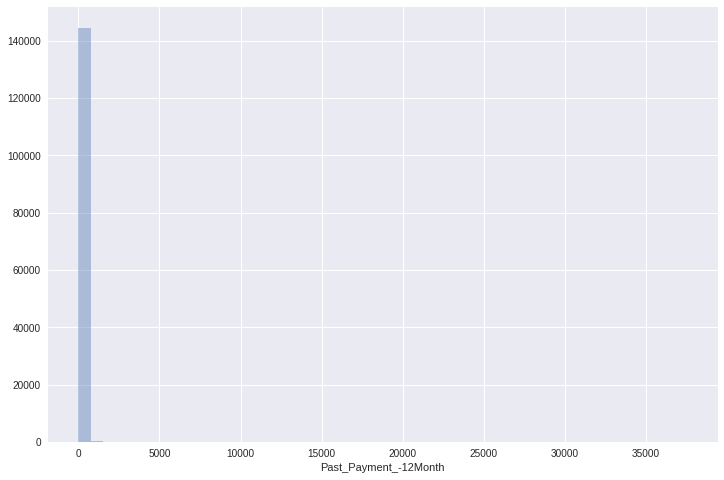

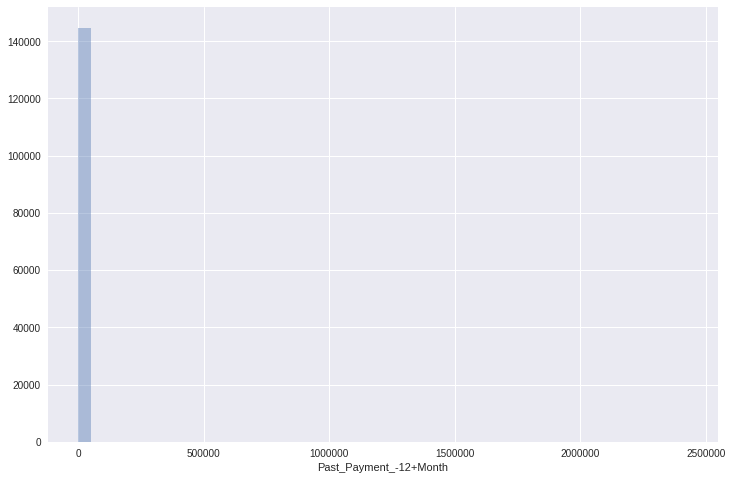

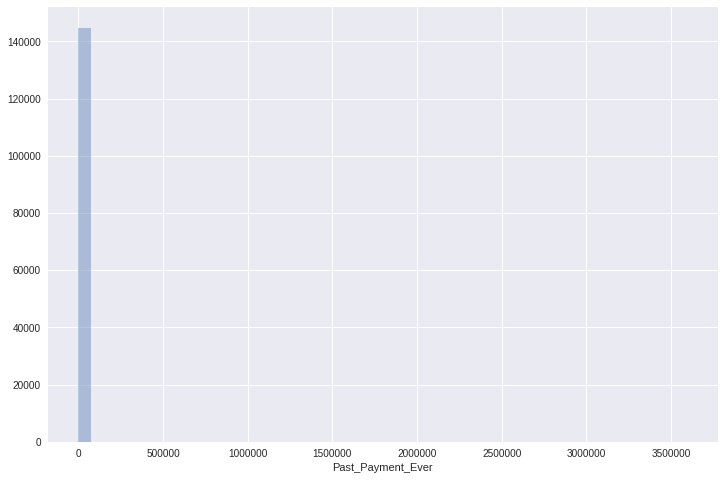

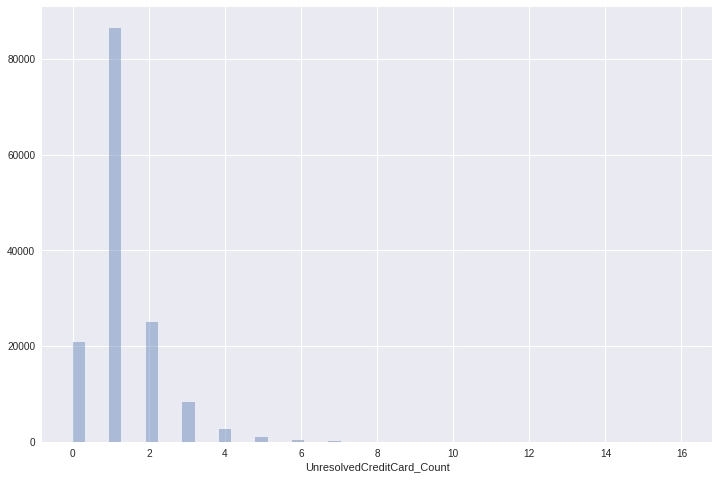

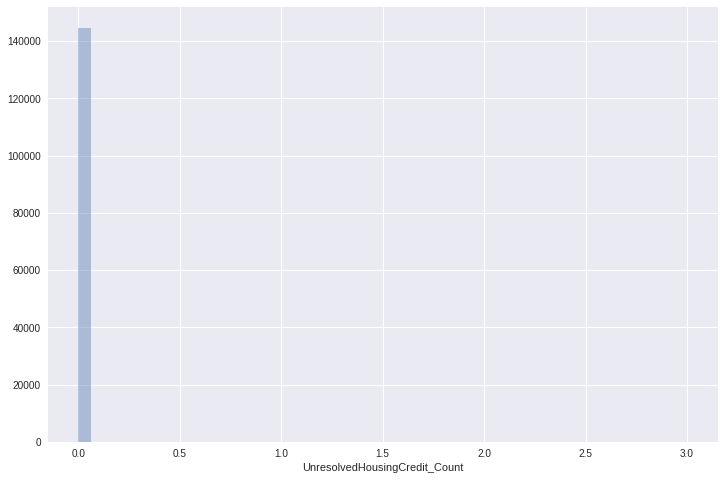

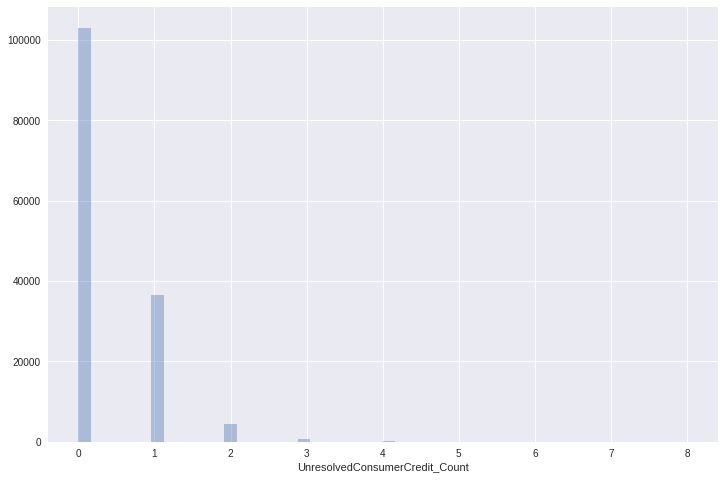

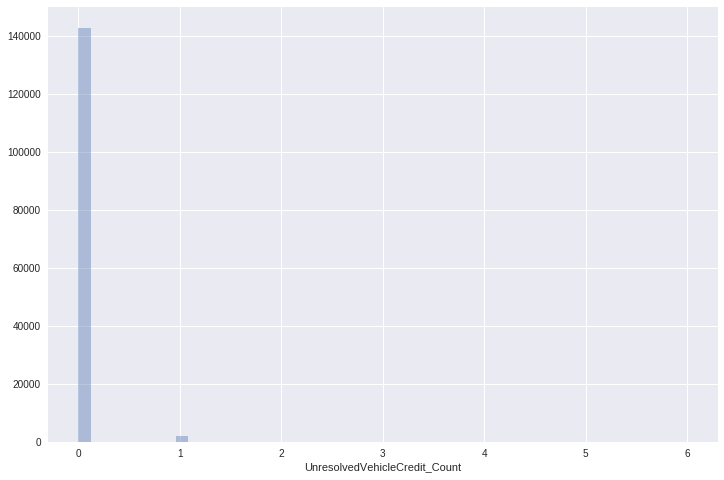

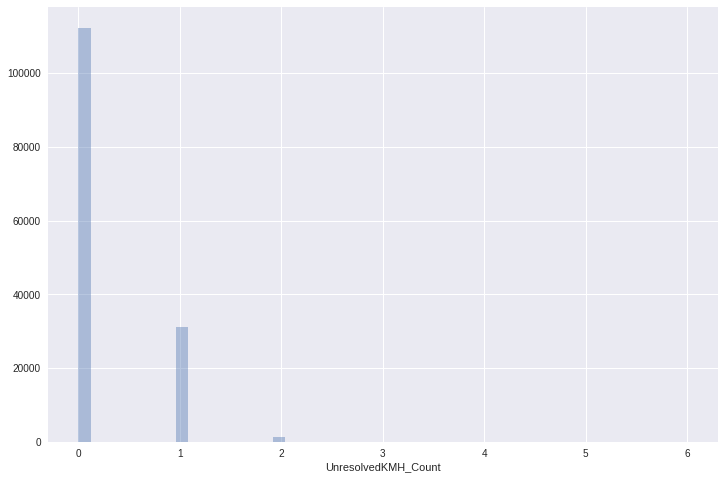

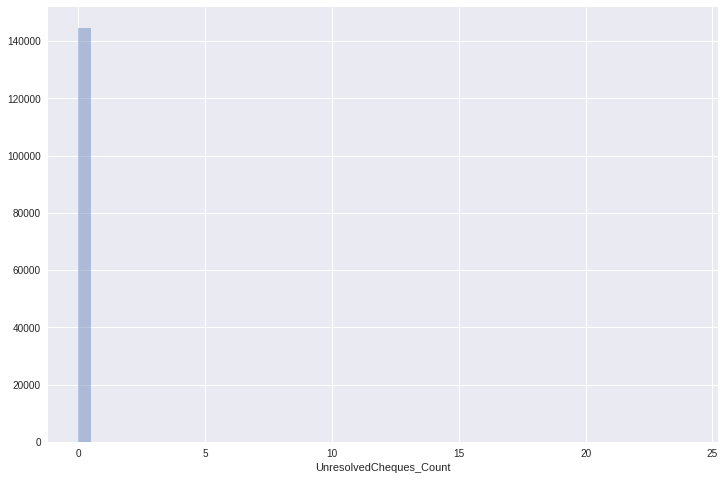

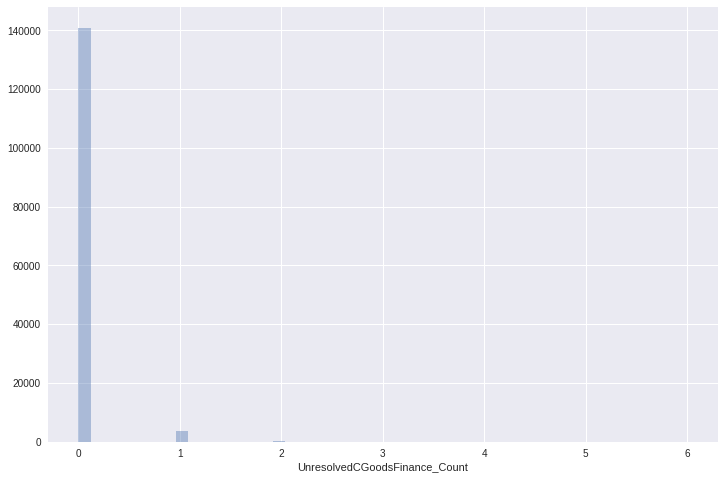

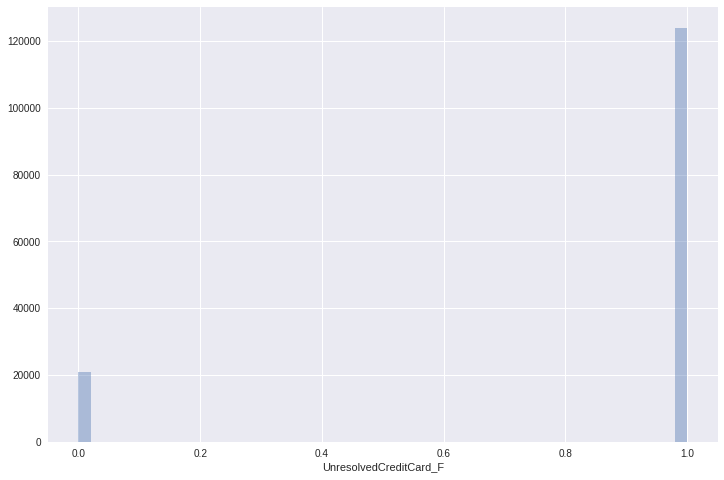

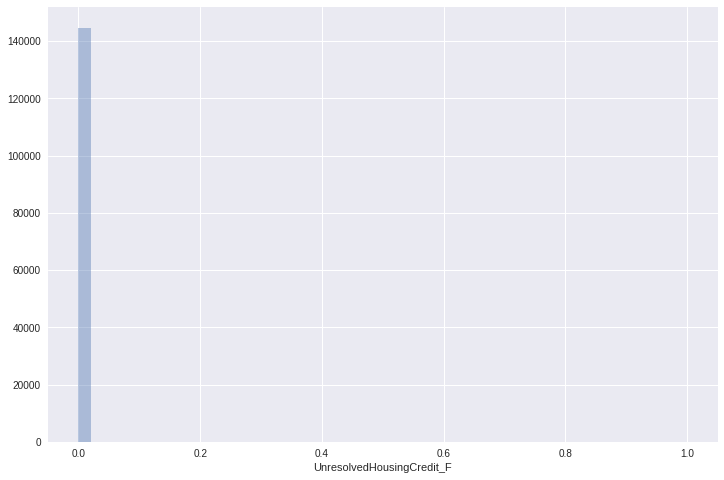

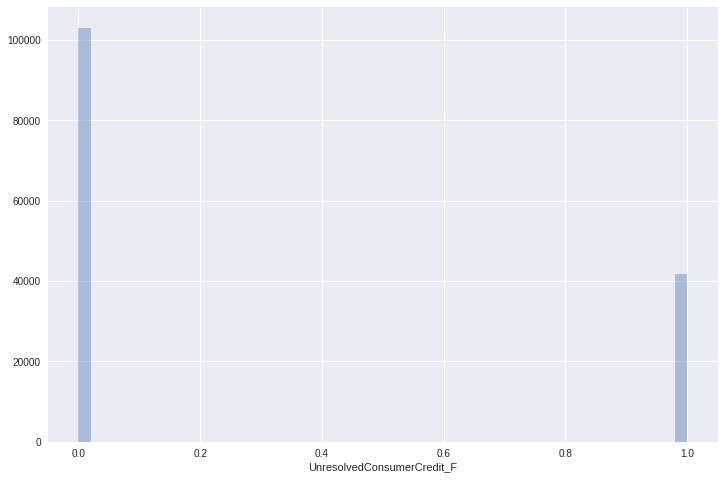

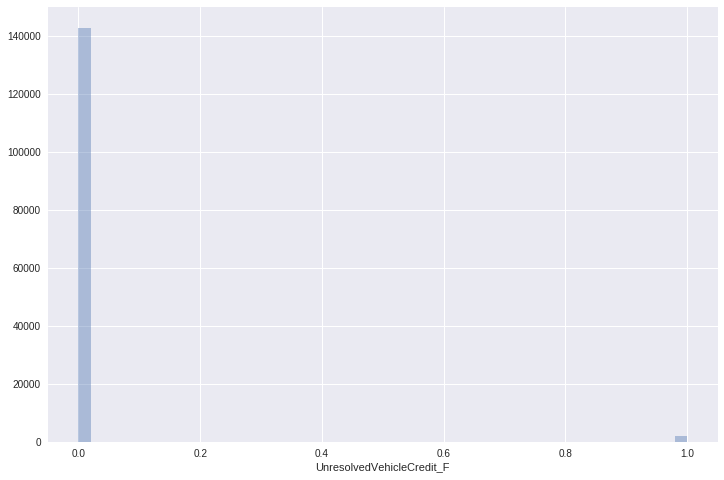

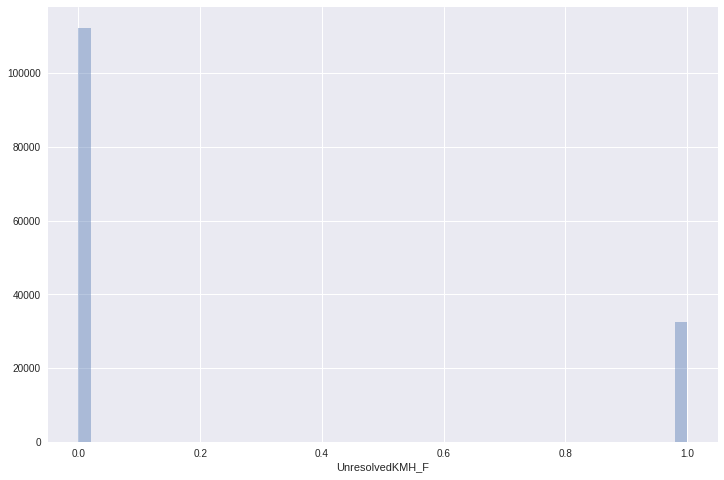

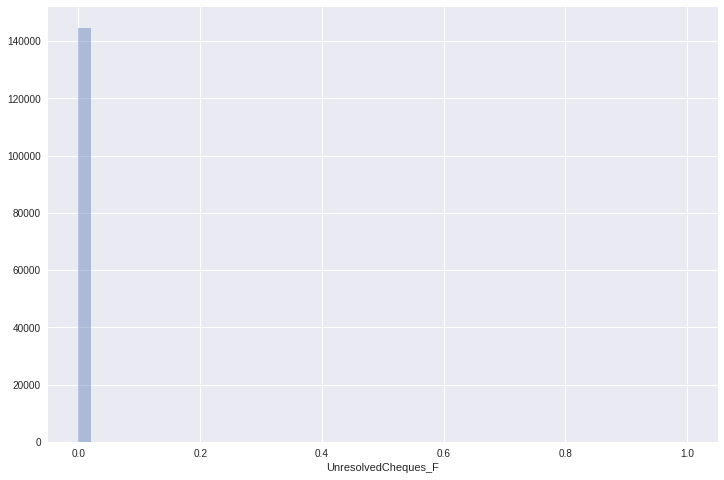

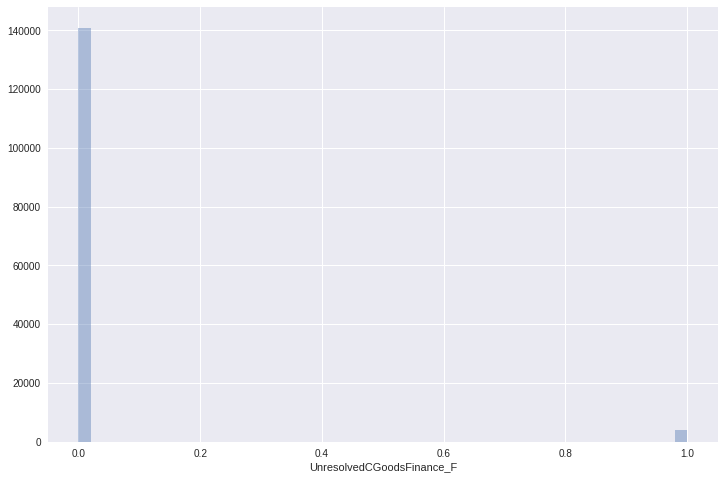

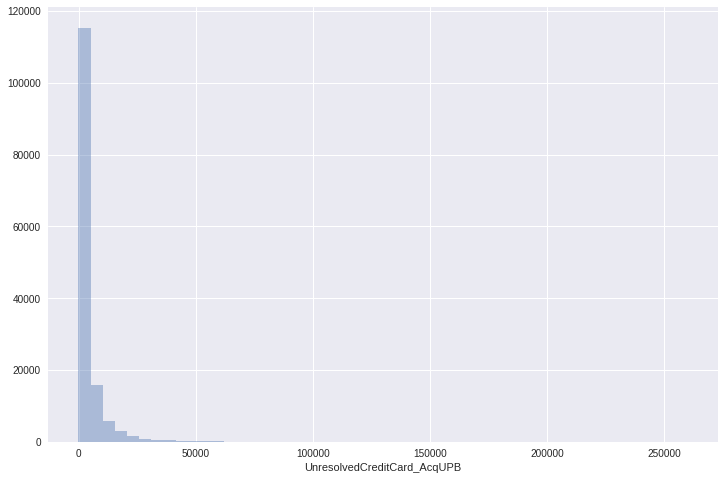

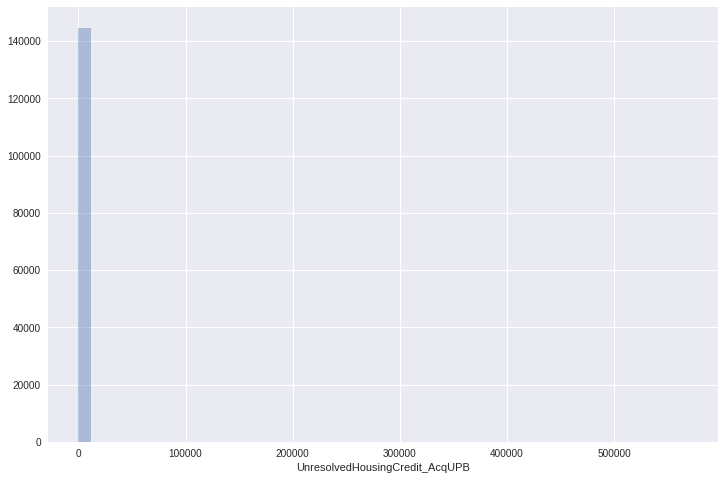

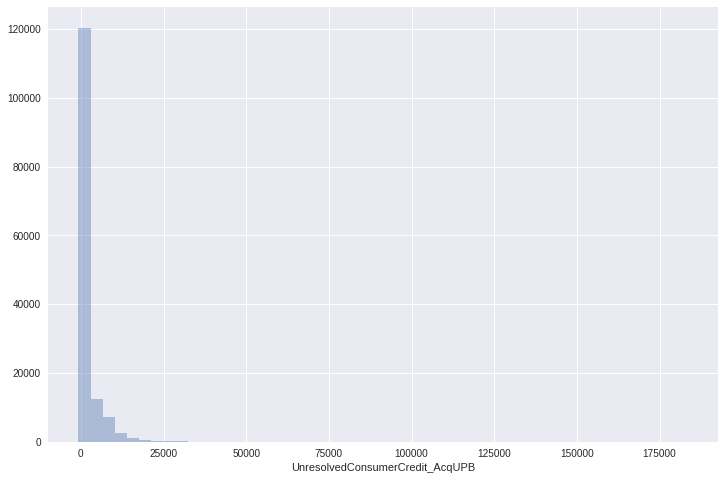

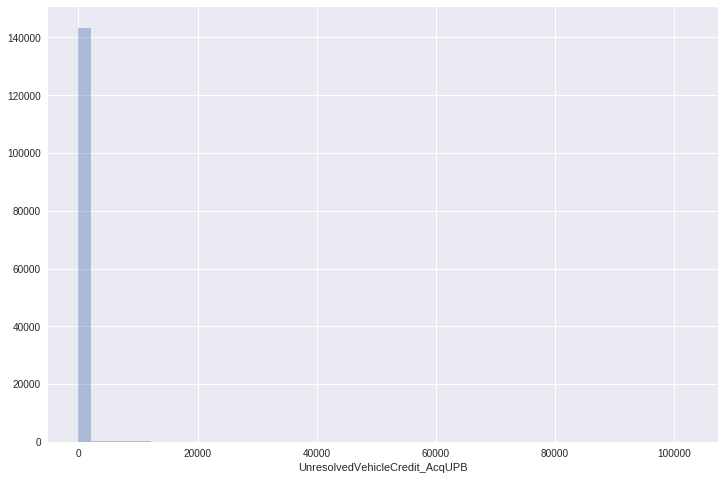

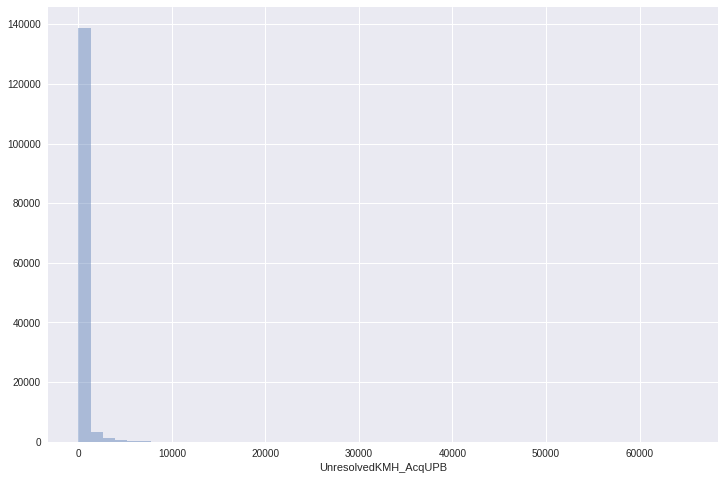

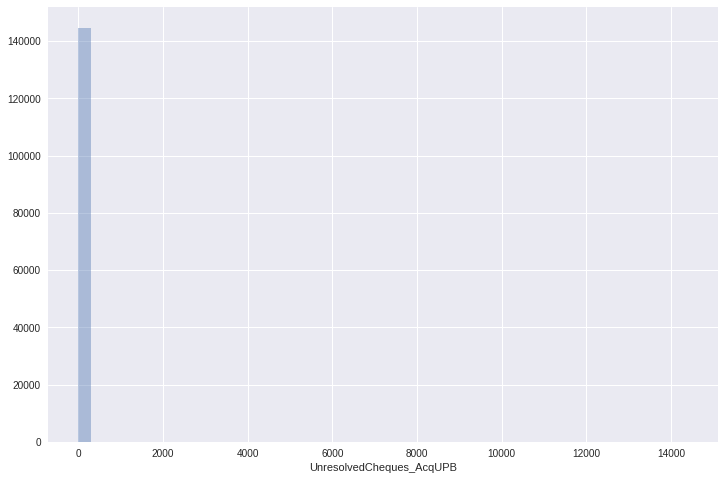

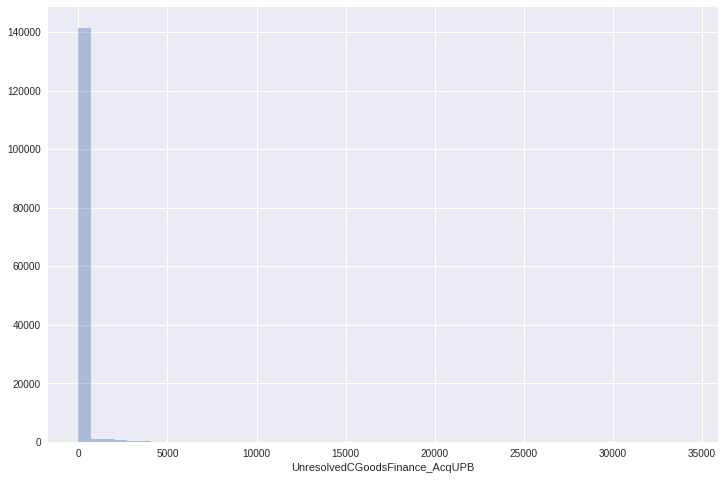

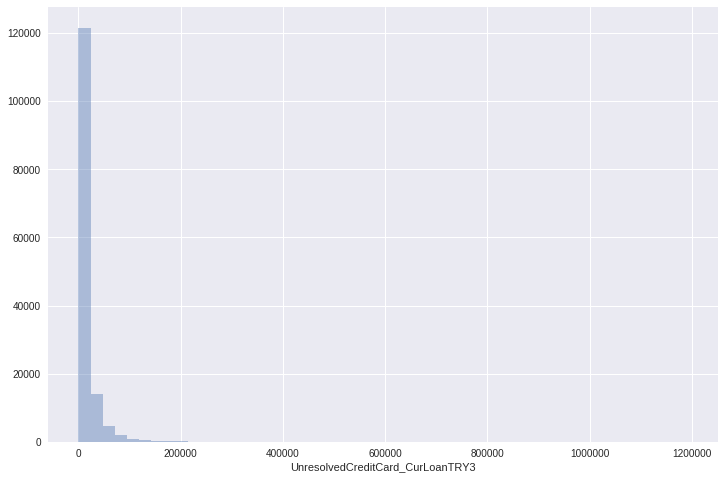

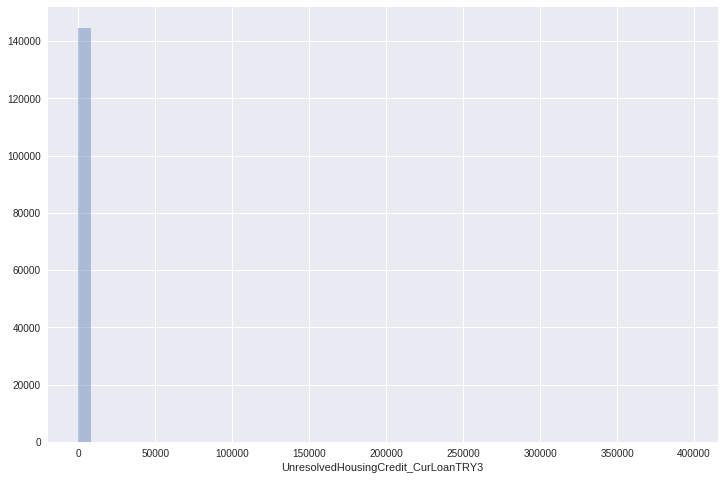

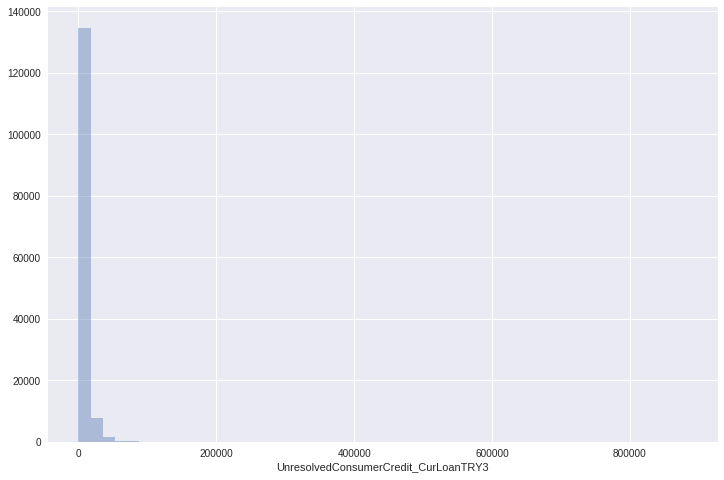

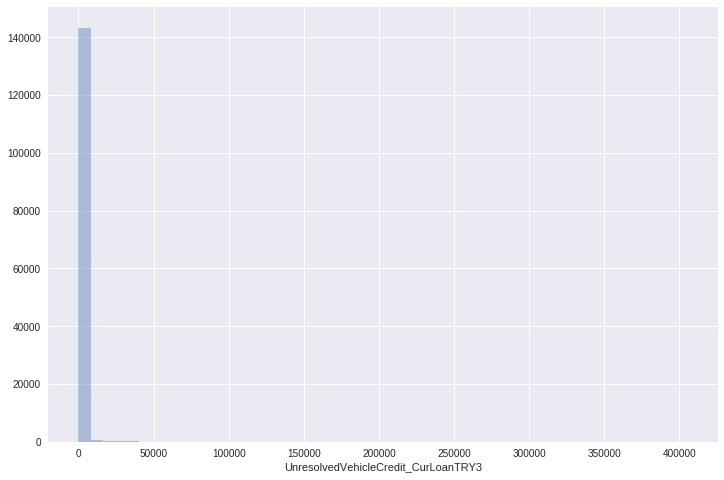

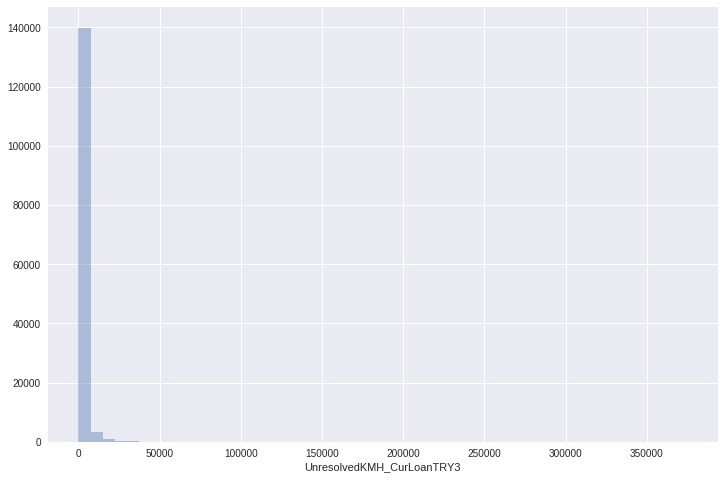

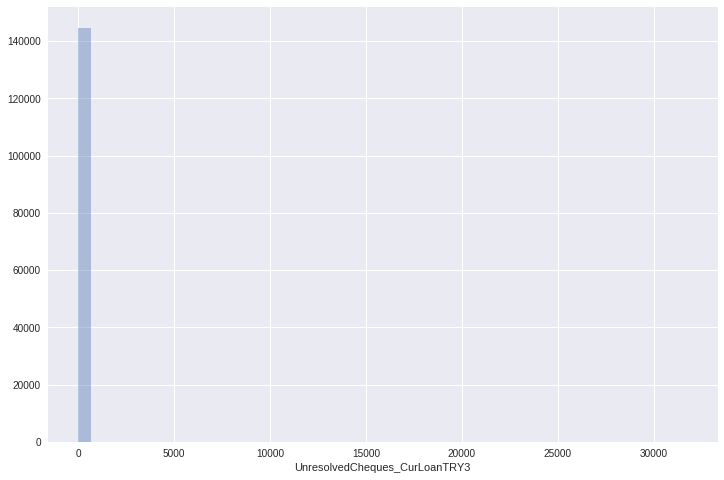

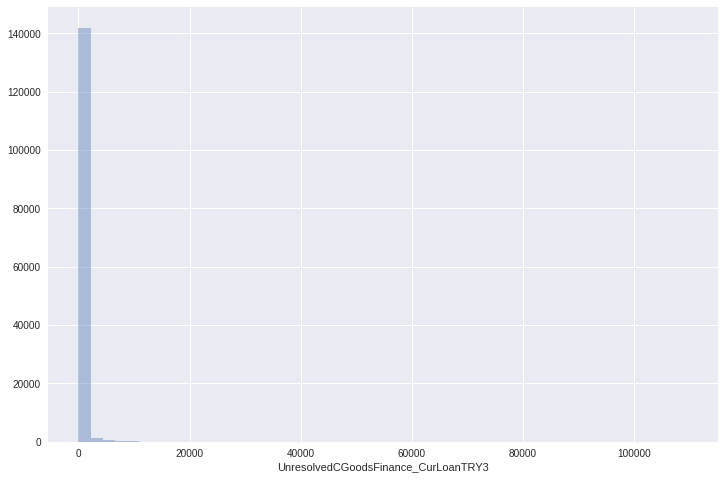

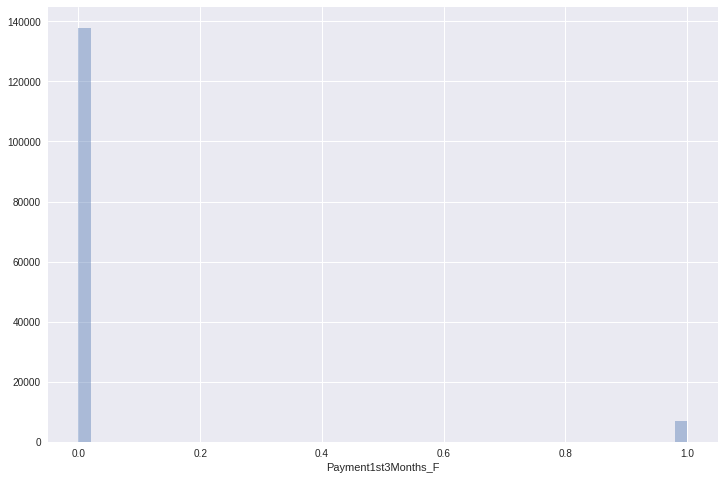

In [17]:
for i in range(len(train.columns)):
    plt.figure(figsize=(12,8))
    type(train.iloc[:,i])
    sns.distplot(train.iloc[:,i], bins=50, kde=False)
    plt.show()

In [51]:
print('Number of labels that are 1: %i' 
      %train['Payment1st3Months_F'].sum(axis=0))
print('Number of all Labels: %i' 
      %train['Payment1st3Months_F'].count())

Number of labels that are 1: 6891
Number of all Labels: 144788


In [52]:
print('Number of labels that are 1: %i' 
      %test['Payment1st3Months_F'].sum(axis=0))
print('Number of all Labels: %i' 
      %test['Payment1st3Months_F'].count())

Number of labels that are 1: 2912
Number of all Labels: 131877


In [53]:
y_train = train['Payment1st3Months_F']
x_train = train.drop(['Payment1st3Months_F'], axis=1)

In [54]:
y_test = test['Payment1st3Months_F']
x_test = test.drop(['Payment1st3Months_F'], axis=1)

In [55]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:,1]
print('Accuracy for Logistic Regression:')
print(accuracy_score(y_test, y_pred_lr))
print('Confusion Matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_lr))
print('F1 Score for Logistic Regression')
print(f1_score(y_test, y_pred_lr))
print('AUC Score for Logistic Regression')
print(roc_auc_score(y_test, y_pred_proba))

Accuracy for Logistic Regression:
0.977312192422
Confusion Matrix for Logistic Regression
[[128874     91]
 [  2901     11]]
F1 Score for Logistic Regression
0.00729927007299
AUC Score for Logistic Regression
0.59426355349


In [23]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_pred_proba = rf.predict_proba(x_test)[:,1]
print('Accuracy for Random Forest:')
print(accuracy_score(y_test, y_pred_rf))
print('Confusion Matrix for Random Forest')
print(confusion_matrix(y_test, y_pred_rf))
print('F1 Score for Random Forest')
print(f1_score(y_test, y_pred_rf))
print('AUC Score for Random Forest')
print(roc_auc_score(y_test, y_pred_proba))

Accuracy for Random Forest:
0.977858155706
Confusion Matrix for Random Forest
[[128950     15]
 [  2905      7]]
F1 Score for Random Forest
0.00477164280845
AUC Score for Random Forest
0.752164433456


In [24]:
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)
y_pred_gbm = gbm.predict(x_test)
y_pred_proba_gbm = gbm.predict_proba(x_test)[:,1]
print('Accuracy for Gradient Boosting:')
print(accuracy_score(y_test, y_pred_gbm))
print('Confusion Matrix for Gradient Boosting')
print(confusion_matrix(y_test, y_pred_gbm))
print('F1 Score for Gradient Boosting')
print(f1_score(y_test, y_pred_gbm))
print('AUC Score for Gradient Boosting')
print(roc_auc_score(y_test, y_pred_proba_gbm))

Accuracy for Gradient Boosting:
0.977001296663
Confusion Matrix for Gradient Boosting
[[128798    167]
 [  2866     46]]
F1 Score for Gradient Boosting
0.02944
AUC Score for Gradient Boosting
0.783452668445


In [30]:
abm = AdaBoostClassifier()
abm.fit(x_train, y_train)
y_pred_abm = gbm.predict(x_test)
y_pred_proba_abm = abm.predict_proba(x_test)[:,1]
print('Accuracy for AdaBoost:')
print(accuracy_score(y_test, y_pred_abm))
print('Confusion Matrix for AdaBoost')
print(confusion_matrix(y_test, y_pred_abm))
print('F1 Score for AdaBoost')
print(f1_score(y_test, y_pred_abm))
print('AUC Score for AdaBoost')
print(roc_auc_score(y_test, y_pred_proba_abm))

Accuracy for AdaBoost:
0.977001296663
Confusion Matrix for AdaBoost
[[128798    167]
 [  2866     46]]
F1 Score for AdaBoost
0.02944
AUC Score for AdaBoost
0.773966112228


In [79]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]
print('Accuracy for XGBoost:')
print(accuracy_score(y_test, y_pred_xgb))
print('Confusion Matrix for XGBoost')
print(confusion_matrix(y_test, y_pred_xgb))
print('F1 Score for XGBoost')
print(f1_score(y_test, y_pred_xgb))
print('AUC Score for XGBoost')
print(roc_auc_score(y_test, y_pred_proba_xgb))

Accuracy for XGBoost:
0.977767161825
Confusion Matrix for XGBoost
[[128926     39]
 [  2893     19]]
F1 Score for XGBoost
0.02944
AUC Score for XGBoost
0.783198835413


In [82]:
svm1 = svm.SVC()
svm1.fit(x_train, y_train)
y_pred_svm = svm1.predict(x_test)
y_pred_proba_svm = svm1.predict_proba(x_test)[:,1]
print('Accuracy for Support Vector Machine:')
print(accuracy_score(y_test, y_pred_svm))
print('Confusion Matrix for Support Vector Machine')
print(confusion_matrix(y_test, y_pred_svm))
print('F1 Score for Support Vector Machine')
print(f1_score(y_test, y_pred_svm))
print('AUC Score for Support Vector Machine')
print(roc_auc_score(y_test, y_pred_proba_svm))

AttributeError: predict_proba is not available when  probability=False

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
print('Original dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 137897, 1: 6891})


In [27]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(x_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 137897, 1: 137897})


In [28]:
lr = LogisticRegression()
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(x_test)
print('Accuracy for Logistic Regression:')
print(accuracy_score(y_test, y_pred_lr))
print('Confusion Matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_lr))
print('F1 Score for Logistic Regression')
print(f1_score(y_test, y_pred_lr))

Accuracy for Logistic Regression:
0.661980481813
Confusion Matrix for Logistic Regression
[[85214 43751]
 [  826  2086]]
F1 Score for Logistic Regression
0.0855812426922


In [29]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(x_test)
print('Accuracy for Random Forest:')
print(accuracy_score(y_test, y_pred_rf))
print('Confusion Matrix for Random Forest')
print(confusion_matrix(y_test, y_pred_rf))
print('F1 Score for Random Forest')
print(f1_score(y_test, y_pred_rf))

Accuracy for Random Forest:
0.976106523503
Confusion Matrix for Random Forest
[[128655    310]
 [  2841     71]]
F1 Score for Random Forest
0.0431217734589
